# CONSULTAS Y CONCLUSIONES PROYECTO 3

## 1. Importacion de Librerias y Lectura del fichero

In [1]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np
import re

# Imputación de nulos usando métodos avanzados estadísticos
# -----------------------------------------------------------------------
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer

# Librerías de visualización
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt

# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames
pd.set_option('display.max_rows', None) # ver todas las filas

In [2]:
df = pd.read_csv("HR RAW DATA CLEAN.csv")

## 2. ANALISIS CORRELACION DE VARIABLES CATEGÓRICAS Y NUMÉRICAS

In [3]:
variables_numericas=df.select_dtypes(include= 'number')
variables_numericas.columns

Index(['Age', 'Daily_Rate', 'Distance_From_Home', 'Environment_Satisfaction',
       'Hourly_Rate', 'Job_Satisfaction', 'Monthly_Income', 'Monthly_Rate',
       'Num_Companies_Worked', 'Percent_Salary_Hike', 'Performance_Rating',
       'Relationship_Satisfaction', 'Total_Working_Years',
       'Training_Times_Last_Year', 'Work_Life_Balance', 'Years_At_Company',
       'Years_Since_Last_Promotion', 'Years_Current_Manager', 'Date_Birth',
       'Annual_Income'],
      dtype='object')

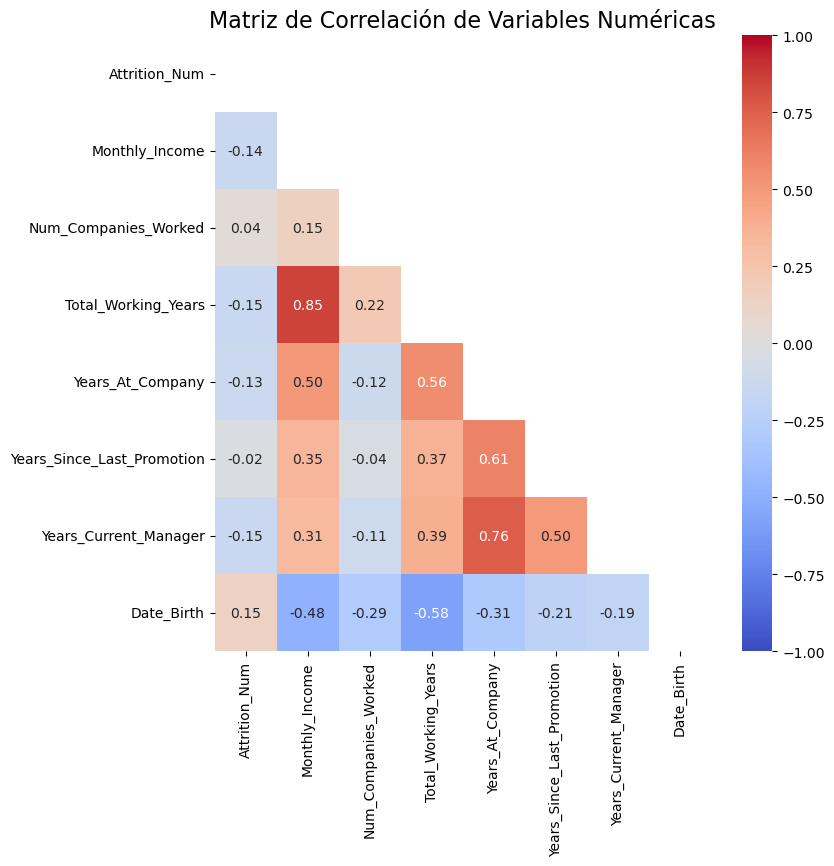

In [4]:
# AHORA YA PODREMOS ENTENDER DE UNA FORMA MÁS AMIGABLE LOS RESULTADOS DE LA MATRIZ DE CORRELACIÓN

#variables_numericas = df.select_dtypes(include=[np.number])

df['Attrition_Num'] = df['Attrition'].map({'Yes': 1, 'No': 0})

variables_correlacion= df[['Attrition_Num','Monthly_Income','Num_Companies_Worked','Total_Working_Years', 'Years_At_Company','Years_Since_Last_Promotion', 'Years_Current_Manager', 'Date_Birth']].columns

matriz_correlacion = df[variables_correlacion].corr()

# establecemos el tamaño de la gráfica
plt.figure(figsize = (8, 8))

# creamos una matriz booleana de máscara
mask = np.triu(np.ones_like(matriz_correlacion, dtype=bool))

# creamos un heatmap con la máscara
sns.heatmap(matriz_correlacion, 
            annot = True, 
            fmt = ".2f", 
            cmap='coolwarm', 
            vmax = 1, 
            vmin = -1, 
            mask = mask); 
plt.title("Matriz de Correlación de Variables Numéricas", fontsize=16)
plt.show()

In [5]:
variables_categoricas = df.select_dtypes(include= 'object').columns

In [6]:
from scipy.stats import chi2_contingency

for var in variables_categoricas:
    tabla = pd.crosstab(df[var], df['Attrition'])
    chi2, p, dof, expected = chi2_contingency(tabla)
    print(f"{var}: p-valor = {p:.4f}")

Attrition: p-valor = 0.0000
Business_Travel: p-valor = 0.0598
Education: p-valor = 0.4306
Education_Field: p-valor = 0.2952
Employee_Number: p-valor = 0.0180
Gender: p-valor = 0.3404
Job_Involvement: p-valor = 0.0000
Job_Level: p-valor = 0.0000
Job_Role: p-valor = 0.0000
Marital_Status: p-valor = 0.0000
Over_Time: p-valor = 0.0000
Standard_Hours: p-valor = 0.9649
Stock_Option_Level: p-valor = 0.0000
Remote_Work: p-valor = 0.4320
Environment_Sat_Cat: p-valor = 0.0000
Job_Sat_Cat: p-valor = 0.0009
Relationship_Sat_Cat: p-valor = 0.1332
Performance_Rat_Cat: p-valor = 0.8710
Work_Balance_Cat: p-valor = 0.0037


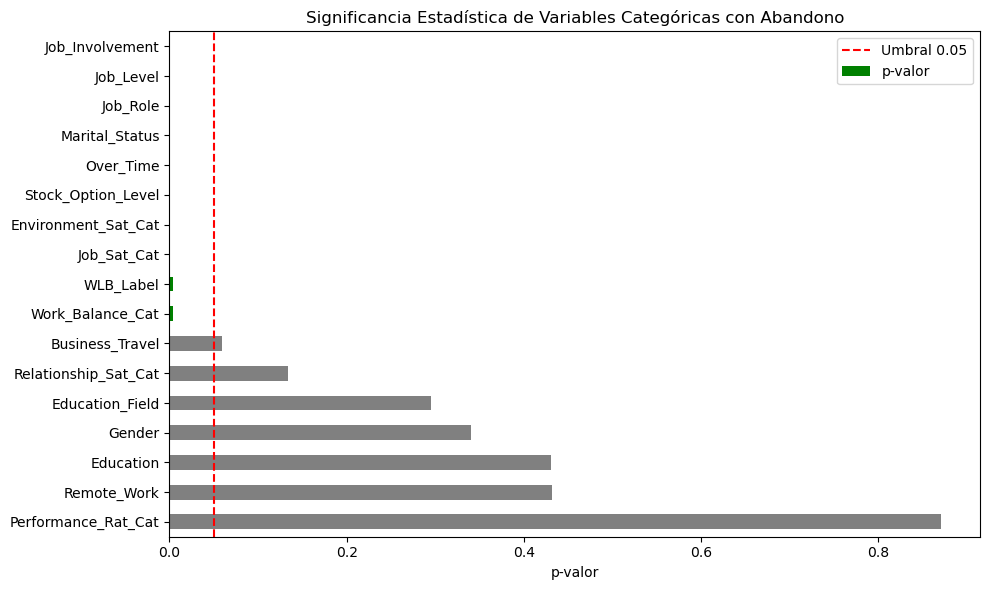

In [7]:
# Crear gráfico de barras con p-valores
import matplotlib.pyplot as plt

# Suponiendo que tienes este diccionario:
pvalores = {
    'Job_Involvement': 0.0000,
    'Job_Level': 0.0000,
    'Job_Role': 0.0000,
    'Marital_Status': 0.0000,
    'Over_Time': 0.0000,
    'Stock_Option_Level': 0.0000,
    'Environment_Sat_Cat': 0.0000,
    'Job_Sat_Cat': 0.0009,
    'Work_Balance_Cat': 0.0037,
    'WLB_Label': 0.0037,
    'Business_Travel': 0.0598,
    'Education': 0.4306,
    'Education_Field': 0.2952,
    'Gender': 0.3404,
    'Remote_Work': 0.4320,
    'Relationship_Sat_Cat': 0.1332,
    'Performance_Rat_Cat': 0.8710
}

# Convertir a DataFrame ordenado
import pandas as pd
df_pval = pd.DataFrame.from_dict(pvalores, orient='index', columns=['p-valor']).sort_values(by='p-valor')

# Colorear según significancia
colors = df_pval['p-valor'].apply(lambda x: 'green' if x < 0.05 else 'gray')

# Graficar
plt.figure(figsize=(10, 6))
df_pval['p-valor'].plot(kind='barh', color=colors)
plt.axvline(0.05, color='red', linestyle='--', label='Umbral 0.05')
plt.xlabel('p-valor')
plt.title('Significancia Estadística de Variables Categóricas con Abandono')
plt.legend()
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


El p-valor indica la probabilidad de obtener los resultados observados si las variables fueran independientes (es decir, si no hay relación entre ellas).

Si p < 0.05 → hay evidencia estadística de que la variable sí está relacionada con el abandono.

Si p ≥ 0.05 → no hay evidencia suficiente para afirmar que esa variable tenga relación con el abandono.

## 3. LOS PERFILES DEL ABANDONO

* 🎯 Edad, experiencia y nivel jerárquico.
* 📊 Gráficos: Histogramas y diagramas de dispersión (edad vs. abandono, años en la empresa vs. abandono).

`Edad`

In [8]:
total_yes = df['Attrition'].value_counts()['Yes']
print(f"Total de personas que abandonaron: {total_yes}")

Total de personas que abandonaron: 252


In [9]:
# Por edad:
abandono_por_edad = df.groupby(['Age', 'Attrition']).size().unstack().fillna(0)['Yes']
abandono_por_edad

Age
18     4.0
19     6.0
20     6.0
21     7.0
22     5.0
23     4.0
24     7.0
25     6.0
26    13.0
27     3.0
28    15.0
29    19.0
30     9.0
31    19.0
32    11.0
33    13.0
34    10.0
35    11.0
36     6.0
37     6.0
38     2.0
39     6.0
40     5.0
41     8.0
42     2.0
43     2.0
44     6.0
45     2.0
46     6.0
47     4.0
48     2.0
49     2.0
50     5.0
51     2.0
52     4.0
53     2.0
54     0.0
55     4.0
56     3.0
57     0.0
58     5.0
59     0.0
60     0.0
Name: Yes, dtype: float64

In [10]:
# Función para clasificar generaciones según la edad
def clasificar_generacion(edad):
    if edad <= 25:
        return 'Gen Z'
    elif 26 <= edad <= 30:
        return 'Centennials'
    elif 30 < edad <= 40:
        return 'Millennial'
    elif 40 < edad <= 50:
        return 'Gen X'
    else:
        return 'Boomers'

# Aplicar la función al DataFrame
df['Generacion'] = df['Age'].apply(clasificar_generacion)

In [11]:
abandono_por_edad = df[df['Attrition'] == 'Yes']['Generacion'].value_counts()

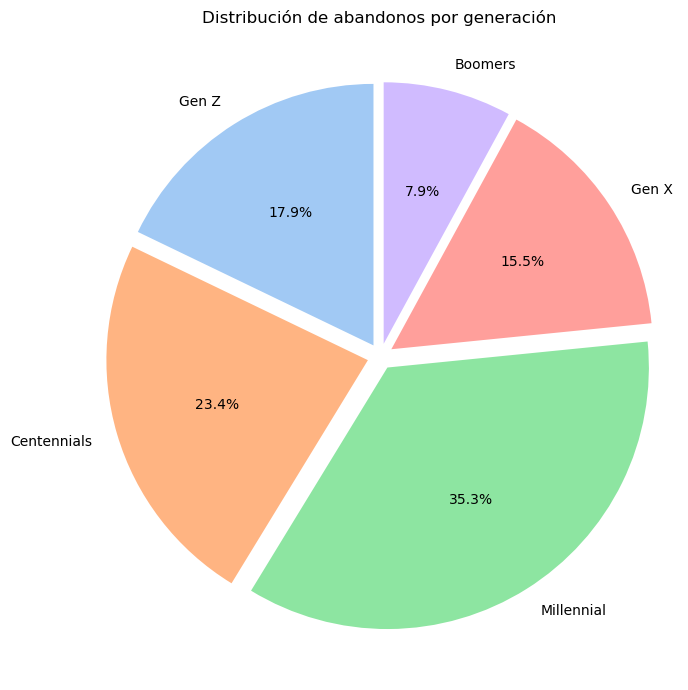

In [12]:
# Orden deseado
orden_gen = ['Gen Z', 'Centennials', 'Millennial', 'Gen X', 'Boomers']
abandono_por_edad = abandono_por_edad.reindex(orden_gen).dropna()

# Gráfico de tarta
plt.figure(figsize=(7, 7))
plt.pie(abandono_por_edad, 
        labels=abandono_por_edad.index, 
        autopct='%1.1f%%', 
        startangle=90, 
        colors=sns.color_palette('pastel', len(abandono_por_edad)),
        explode=[0.05]*len(abandono_por_edad))

plt.title('Distribución de abandonos por generación')
plt.axis('equal')
plt.tight_layout()
plt.show()

Rotación por Edad

    Conclusión: La tasa de rotación es considerablemente más alta entre los empleados más jóvenes. A medida que aumenta la edad, la tasa de abandono disminuye. Esto puede estar relacionado con la búsqueda de estabilidad laboral en etapas más avanzadas de la vida o con mayores responsabilidades familiares o económicas.

Rotación por Generación

    Conclusión: Las generaciones más jóvenes (Gen Z y Centennials) presentan las tasas de abandono más elevadas. En contraste, los empleados pertenecientes a generaciones mayores como Gen X y Boomers muestran menor rotación. Esto sugiere una posible diferencia en las expectativas laborales o en el compromiso con la organización entre generaciones


`Género`

In [13]:
# Filtrar solo las personas que abandonaron por género:
abandono_por_genero = df.groupby(['Gender', 'Attrition']).size().unstack().fillna(0)['Yes']
abandono_por_genero

Gender
Female     93
Male      159
Name: Yes, dtype: int64

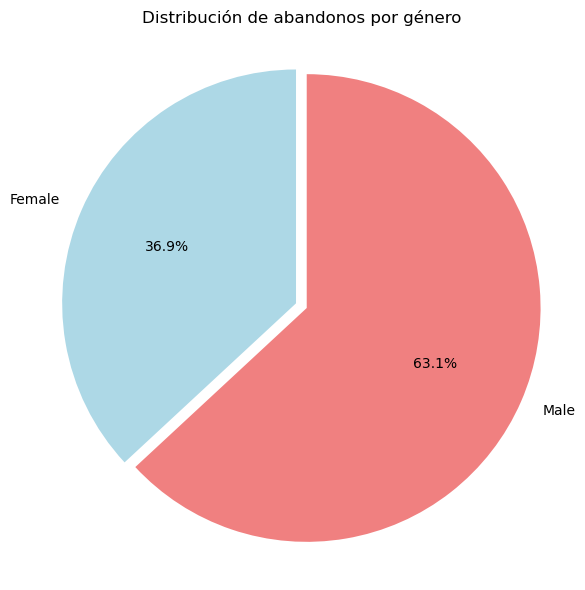

In [14]:
# Crear el gráfico
plt.figure(figsize=(6, 6))
plt.pie(abandono_por_genero, 
        labels=abandono_por_genero.index, 
        autopct='%.1f%%', 
        startangle=90, 
        colors=['lightblue', 'lightcoral'], 
        explode=(0.05, 0))  # resalta la primera categoría

plt.title('Distribución de abandonos por género')
plt.axis('equal')  # Asegura que el círculo sea circular
plt.tight_layout()
plt.show()

Rotación por Género

    Conclusión: La distribución de la rotación por género puede revelar diferencias sutiles, pero si un género muestra más abandono (por ejemplo, mujeres), podría indicar desigualdades en el entorno laboral, conciliación vida-trabajo o desarrollo profesional. Si la diferencia no es significativa, se puede concluir que la rotación es relativamente equitativa por género.

`Estado Civil`

In [15]:
# Por estado:
abandono_por_estado = df[df['Attrition'] == 'Yes']['Marital_Status'].value_counts()

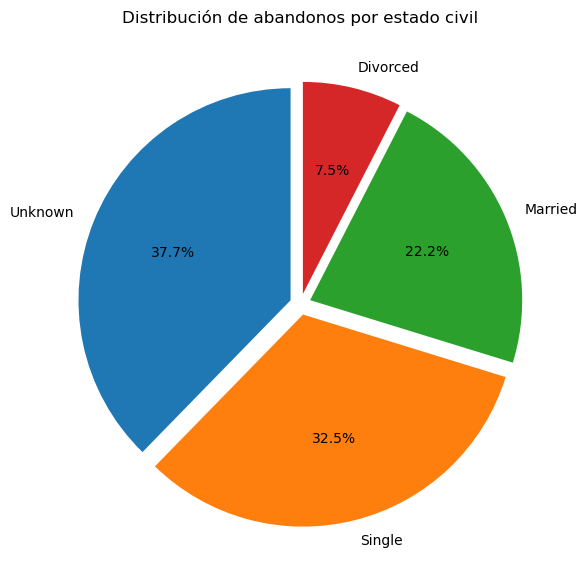

In [16]:
# Crear el gráfico
plt.figure(figsize=(6, 6))
plt.pie(abandono_por_estado, 
        labels=abandono_por_estado.index, 
        autopct='%.1f%%', 
        startangle=90, 
        explode=[0.05]*len(abandono_por_estado)) 

plt.title('Distribución de abandonos por estado civil')
plt.axis('equal')
plt.tight_layout()
plt.show()

Rotación por Estado Civil

    Conclusión: Las personas solteras suelen presentar una mayor tasa de abandono en comparación con personas casadas o divorciadas. Esto puede deberse a una mayor movilidad, menos responsabilidades familiares o mayor disposición al cambio por parte de los empleados solteros.

`Nivel de estudios`

In [17]:
# Nivel de estudios:
abandono_por_estudios = df[df['Attrition'] == 'Yes']['Education'].value_counts()

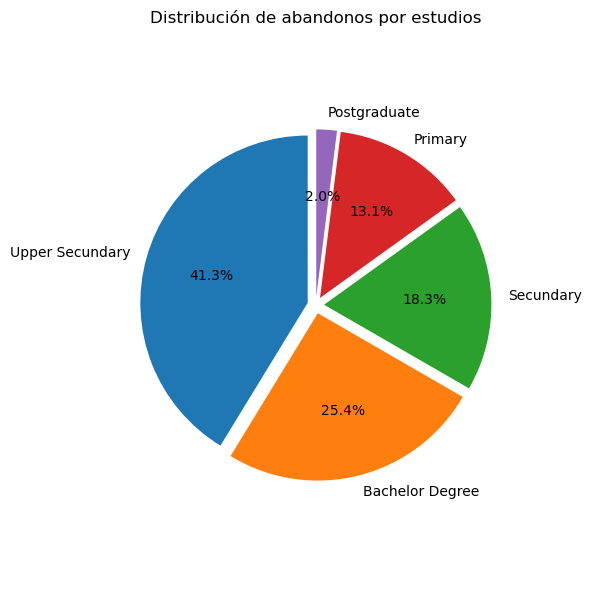

In [18]:
# Crear el gráfico
plt.figure(figsize=(6, 6))
plt.pie(abandono_por_estudios, 
        labels=abandono_por_estudios.index, 
        autopct='%.1f%%', 
        startangle=90, 
        explode=[0.05]*len(abandono_por_estudios)) 

plt.title('Distribución de abandonos por estudios')
plt.axis('equal')
plt.tight_layout()
plt.show()

Rotación por Nivel Educativo

    Conclusión: La rotación tiende a variar con el nivel educativo. En algunos casos, los empleados con niveles educativos más bajos abandonan más, quizás por acceder a empleos menos estables o peor remunerados. Sin embargo, también puede ocurrir que quienes tienen niveles altos (como posgrados) busquen mejores oportunidades y rotan más si no están satisfechos.

`Experiencia` (CAMBIAR A GRAFICO QUESITO!!!)

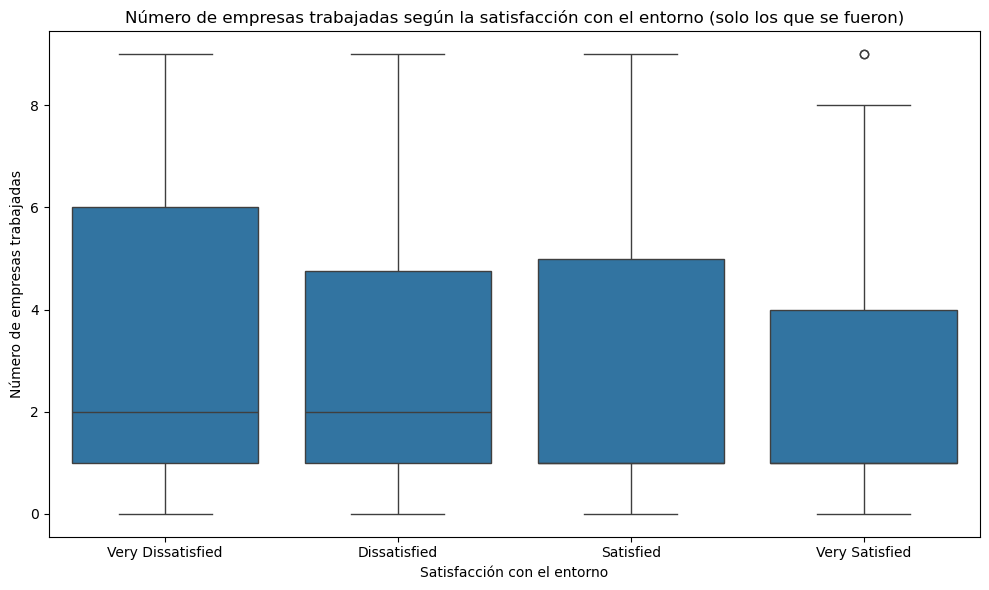

In [19]:
# Filtrar solo empleados que dejaron la empresa
df_plot = df[df['Attrition'] == 'Yes'].copy()

# Graficar
plt.figure(figsize=(10, 6))
sns.boxplot(
    x='Environment_Sat_Cat',
    y='Num_Companies_Worked',
    data=df_plot,
    order=['Very Dissatisfied', 'Dissatisfied', 'Satisfied', 'Very Satisfied']
)

plt.title('Número de empresas trabajadas según la satisfacción con el entorno (solo los que se fueron)')
plt.xlabel('Satisfacción con el entorno')
plt.ylabel('Número de empresas trabajadas')
plt.tight_layout()
plt.show()


 Número de Empresas Trabajadas y Satisfacción con el Entorno Laboral
Este conjunto de diagramas de caja examina si el número de empresas previas en las que ha trabajado un empleado está relacionado con su satisfacción actual con el entorno laboral.

La mediana es constante en torno a 2 empresas trabajadas para todos los niveles de satisfacción.

El rango intercuartílico es similar entre grupos (entre 1 y 4 empresas), y todos presentan valores atípicos con más de 8 empleos anteriores.

Conclusión: No se observa una relación clara entre el número de empresas en las que ha trabajado un empleado y su nivel de satisfacción con el entorno laboral actual.

`JOB SATISFACTION` (CAMBIAR A GRAFICO QUESITO!!!)

C:\Users\noemi\AppData\Local\Temp\ipykernel_3496\4037127790.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_plot, x='Job_Sat_Cat', palette='pastel')


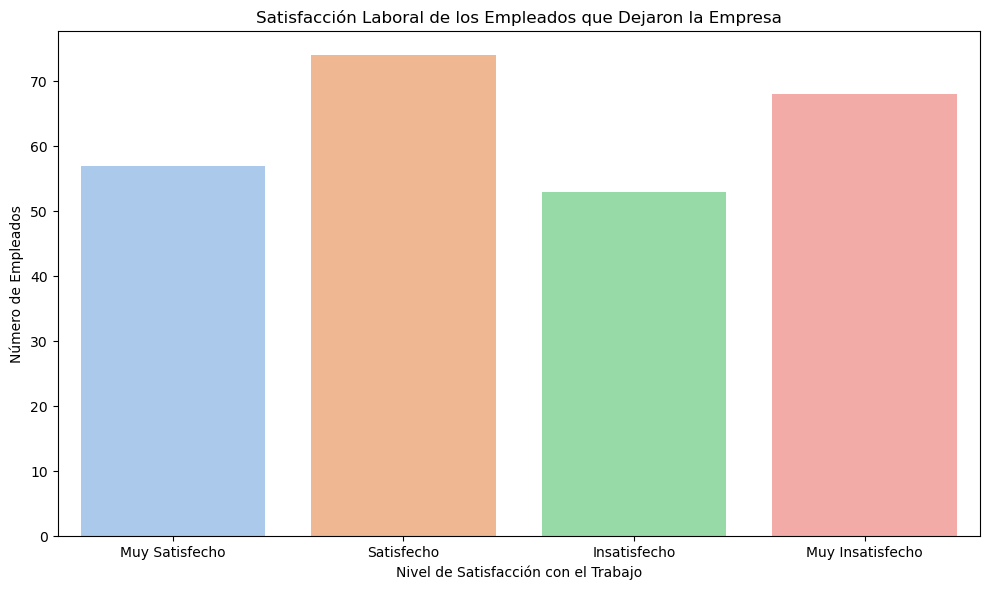

In [20]:

df_plot = df[df['Attrition'] == 'Yes'].copy()

# Traducir las categorías de satisfacción laboral
traduccion = {
    'Very Dissatisfied': 'Muy Insatisfecho',
    'Dissatisfied': 'Insatisfecho',
    'Satisfied': 'Satisfecho',
    'Very Satisfied': 'Muy Satisfecho'
}
df_plot['Job_Sat_Cat'] = df_plot['Job_Sat_Cat'].replace(traduccion)

# Definir el orden deseado de las categorías
orden_satisfaccion = ['Muy Satisfecho', 'Satisfecho', 'Insatisfecho', 'Muy Insatisfecho']
df_plot['Job_Sat_Cat'] = pd.Categorical(df_plot['Job_Sat_Cat'], categories=orden_satisfaccion, ordered=True)

# Graficar solo los empleados que dejaron la empresa
plt.figure(figsize=(10, 6))
sns.countplot(data=df_plot, x='Job_Sat_Cat', palette='pastel')

plt.title('Satisfacción Laboral de los Empleados que Dejaron la Empresa')
plt.xlabel('Nivel de Satisfacción con el Trabajo')
plt.ylabel('Número de Empleados')
plt.tight_layout()
plt.show()


#### Porcentaje de rotación por `Job_Role` (Puesto de Trabajo)

C:\Users\noemi\AppData\Local\Temp\ipykernel_3496\3884936515.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_percent_yes.index, y=df_percent_yes.values, palette="rocket")


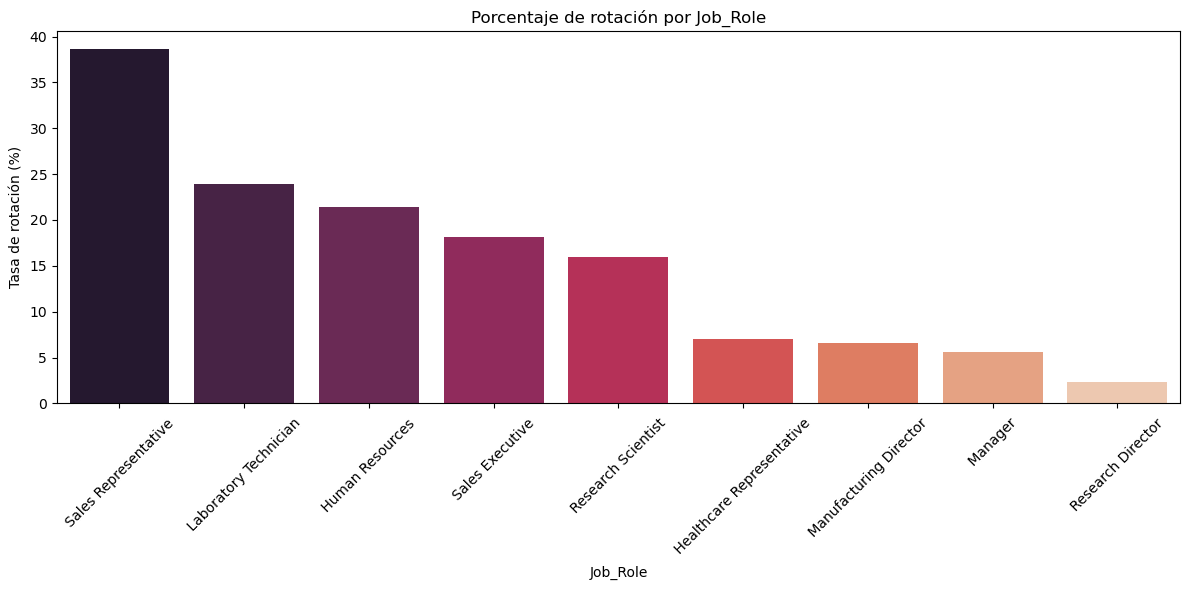

In [21]:
# Calcular la tasa de rotación según Job_Role
df_percent = df.groupby("Job_Role")["Attrition"].value_counts(normalize=True).unstack().fillna(0) * 100
df_percent_yes = df_percent["Yes"].sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=df_percent_yes.index, y=df_percent_yes.values, palette="rocket")
plt.title("Porcentaje de rotación por Job_Role")
plt.ylabel("Tasa de rotación (%)")
plt.xlabel("Job_Role")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Se observa que los empleados con roles de Sales Representative y Laboratory Technician presentan mayor número absoluto de abandonos.

Los roles como Manager y Research Director tienen bajas tasas de abandono.

✅ Conclusión: Ciertos puestos operativos o menos especializados tienden a tener más rotación. Esto sugiere que los cargos con menor estabilidad o menores oportunidades de crecimiento presentan mayor attrition.

 #### Jerarquía de Puesto

C:\Users\noemi\AppData\Local\Temp\ipykernel_3496\3507546478.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_percent_yes.index, y=df_percent_yes.values, palette="rocket")


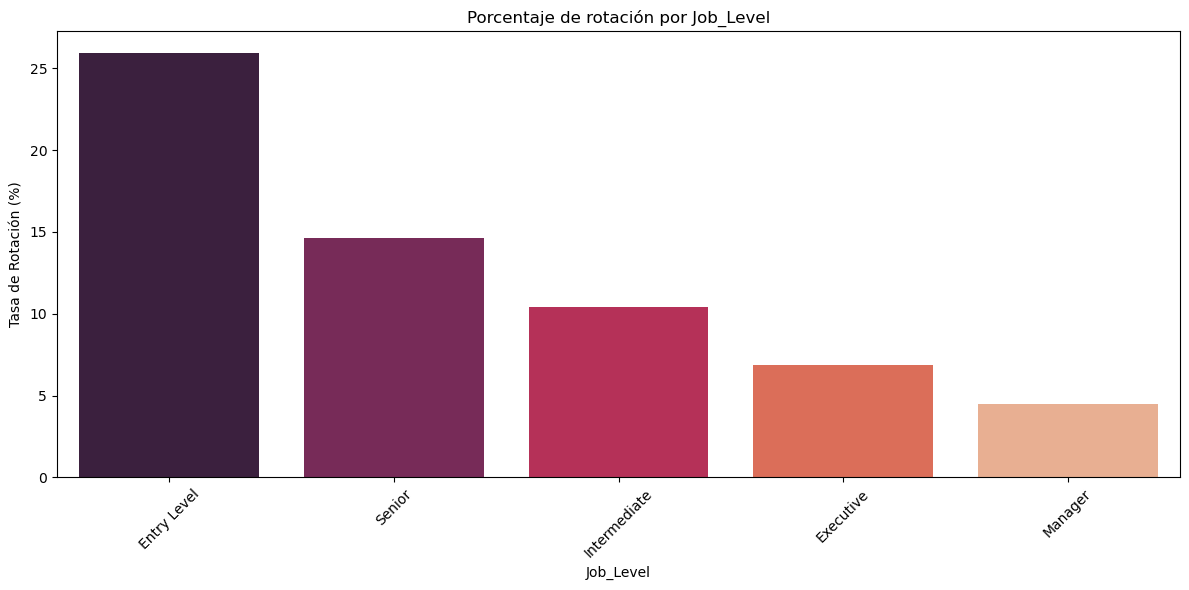

In [22]:
# Calcular la tasa de rotación según Job_Level
df_percent = df.groupby("Job_Level")["Attrition"].value_counts(normalize=True).unstack().fillna(0) * 100
df_percent_yes = df_percent["Yes"].sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=df_percent_yes.index, y=df_percent_yes.values, palette="rocket")
plt.title("Porcentaje de rotación por Job_Level")
plt.ylabel("Tasa de Rotación (%)")
plt.xlabel("Job_Level")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Los niveles de entrada (Entry Level) e intermedios tienen mayor cantidad de abandonos.

En niveles altos (Manager, Executive) casi no hay rotación.

✅ Conclusión: Los empleados de nivel más bajo están más propensos a abandonar la empresa, posiblemente por razones salariales, de insatisfacción o búsqueda de crecimiento.

#### Frecuencia de viajes de trabajo

C:\Users\noemi\AppData\Local\Temp\ipykernel_3496\368651325.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_percent_yes.index, y=df_percent_yes.values, palette="rocket")


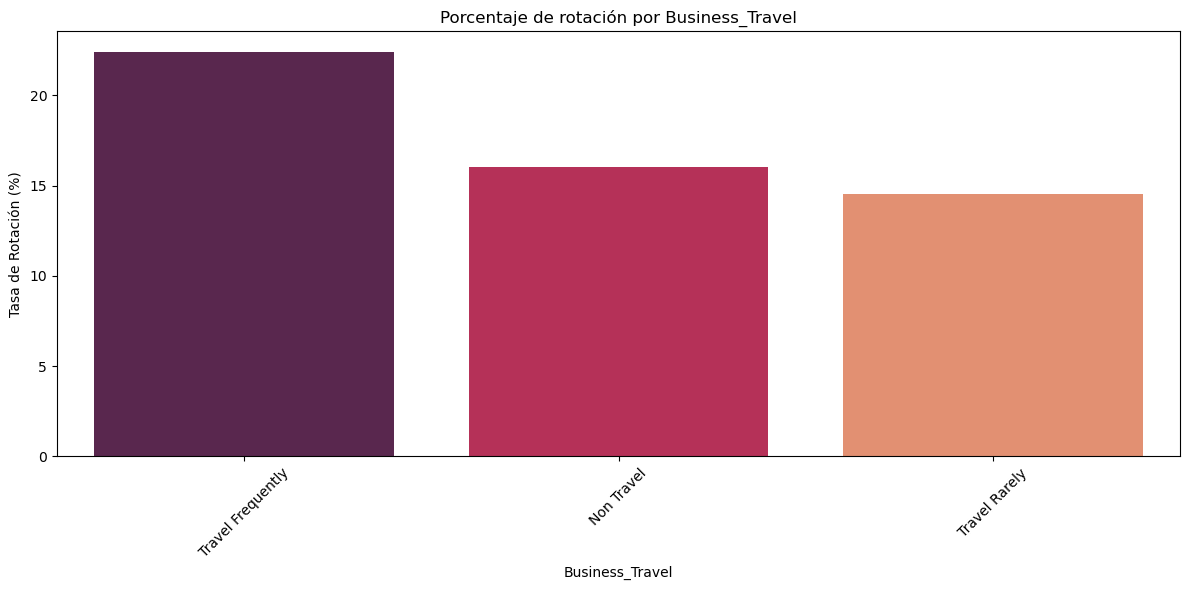

In [23]:
# Calcular porcentaje de empleados que se fueron por grupo para Business_Travel
df_percent = df.groupby("Business_Travel")["Attrition"].value_counts(normalize=True).unstack().fillna(0) * 100
df_percent_yes = df_percent["Yes"].sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=df_percent_yes.index, y=df_percent_yes.values, palette="rocket")
plt.title("Porcentaje de rotación por Business_Travel")
plt.ylabel("Tasa de Rotación (%)")
plt.xlabel("Business_Travel")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Aquellos que viajan frecuentemente tienen más rotación proporcionalmente.

Los que no viajan o viajan rara vez tienen menos tasa de abandono.

✅ Conclusión: La frecuencia alta de viajes puede generar desgaste, afectar el equilibrio vida-trabajo y fomentar la rotación.

#### Horas estándar

C:\Users\noemi\AppData\Local\Temp\ipykernel_3496\1269139827.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_percent_yes.index, y=df_percent_yes.values, palette="rocket")


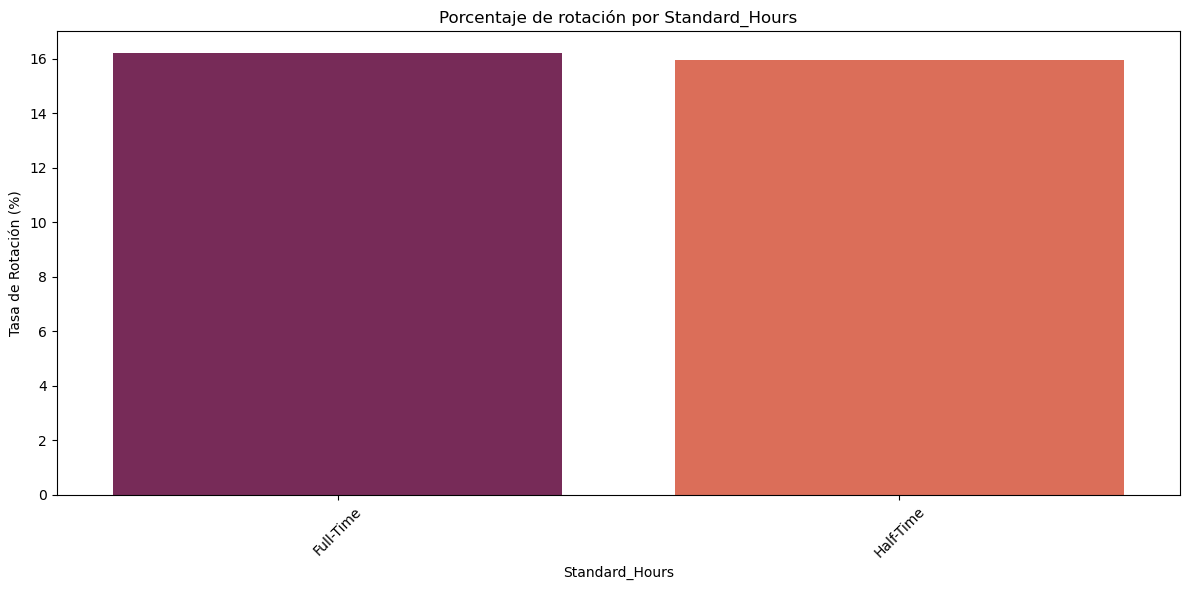

In [24]:
# Calcular porcentaje de empleados que se fueron por grupo para Standard_Hours
df_percent = df.groupby("Standard_Hours")["Attrition"].value_counts(normalize=True).unstack().fillna(0) * 100
df_percent_yes = df_percent["Yes"].sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=df_percent_yes.index, y=df_percent_yes.values, palette="rocket")
plt.title("Porcentaje de rotación por Standard_Hours")
plt.ylabel("Tasa de Rotación (%)")
plt.xlabel("Standard_Hours")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Tanto a tiempo completo como parcial hay rotación, pero proporcionalmente parece más común en Half-Time.

✅ Conclusión: Aunque la mayoría de la empresa es full-time, los empleados part-time muestran una tasa de abandono relativamente elevada, lo que podría deberse a precariedad laboral o falta de integración.

## 4. MOTIVOS DE ABANDONO

### 🧠 Satisfacción y Bienestar

#### Factores Clave de la Rotación: Satisfacción, Ambiente y Relaciones Laborales:

1. ¿Existe menor satisfacción laboral entre los que se marchan? 
2. ¿Cómo afecta la satisfacción con el ambiente laboral a la rotación? 
3. ¿Qué nivel de relación interpersonal tienen quienes se van?

In [25]:
# CONFIGURACION DE LOS DATOS
# -----------------------------------------------------------------------

satisf_vars = ['Job_Satisfaction', 'Environment_Satisfaction', 'Relationship_Satisfaction']
nivel_labels = {
    1: 'Very Dissatisfied',
    2: 'Dissatisfied',
    3: 'Satisfied',
    4: 'Very Satisfied'
}

orden_niveles = ['Very Dissatisfied', 'Dissatisfied', 'Satisfied', 'Very Satisfied']
nivel_labels_cat = pd.CategoricalDtype(categories=orden_niveles, ordered=True)

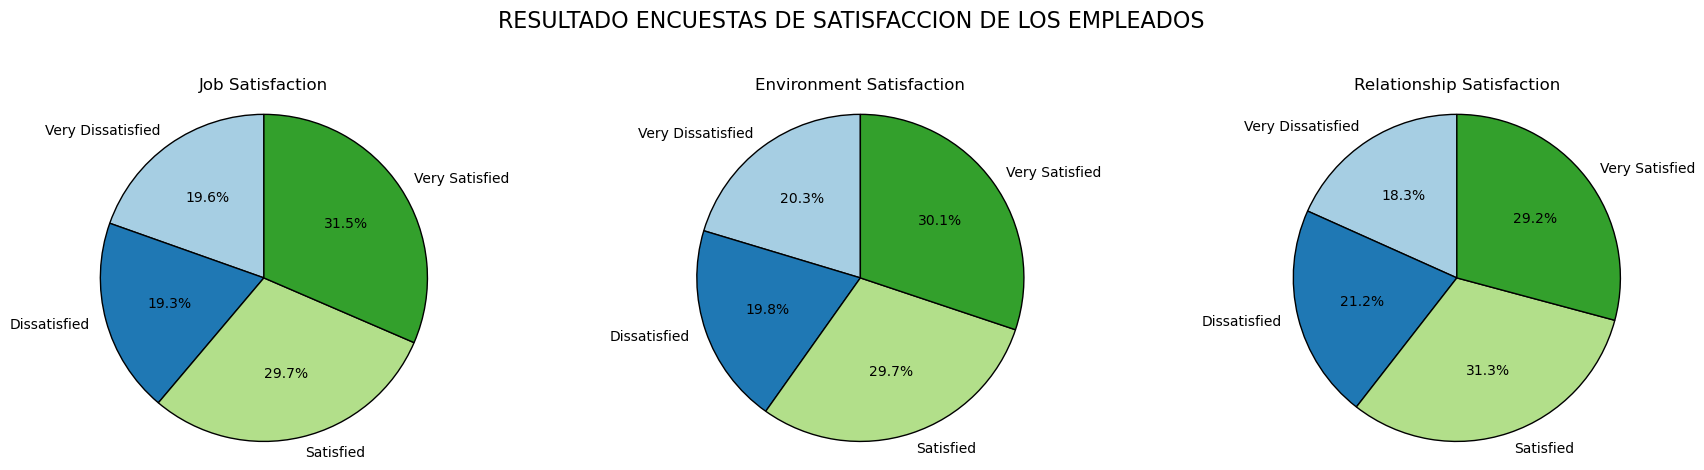

In [26]:
# GRAFICO 1: RESPUESTAS DE LAS ENCUESTAS DE SATISFACCIÓN
# -----------------------------------------------------------------------

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, var in enumerate(satisf_vars):
    # Conteo por nivel
    counts = df[var].map(nivel_labels).value_counts().reindex(orden_niveles)
    
    # Pie chart
    axes[i].pie(
        counts,
        labels=orden_niveles,
        autopct='%1.1f%%',
        startangle=90,
        colors=plt.cm.Paired.colors,
        wedgeprops={'edgecolor': 'black'}
    )
    
    axes[i].axis('equal')  # Hacerlo circular
    axes[i].set_title(var.replace("_", " ").title())

plt.suptitle('RESULTADO ENCUESTAS DE SATISFACCION DE LOS EMPLEADOS', fontsize=16)
plt.tight_layout(rect=[0, 0.05, 1, 0.95])
plt.show()

In [27]:
# TASA DE ABANDOMENTO POR NIVEL DE SATISFACCIÓN
# -----------------------------------------------------------------------

# Diccionario para guardar las tablas
tablas = {}

for var in satisf_vars:
    # Agrupar y calcular proporciones por nivel y attrition
    tabla = df.groupby([df[var].map(nivel_labels), 'Attrition']).size().unstack().fillna(0)
    
    # Convertir a porcentaje por fila
    tabla_percent = tabla.div(tabla.sum(axis=1), axis=0) * 100
    
    # Renombrar columnas
    tabla_percent.rename(columns={'Yes': 'Sí', 'No': 'No'}, inplace=True)

    # Guardar
    tablas[var] = tabla_percent.round(2)




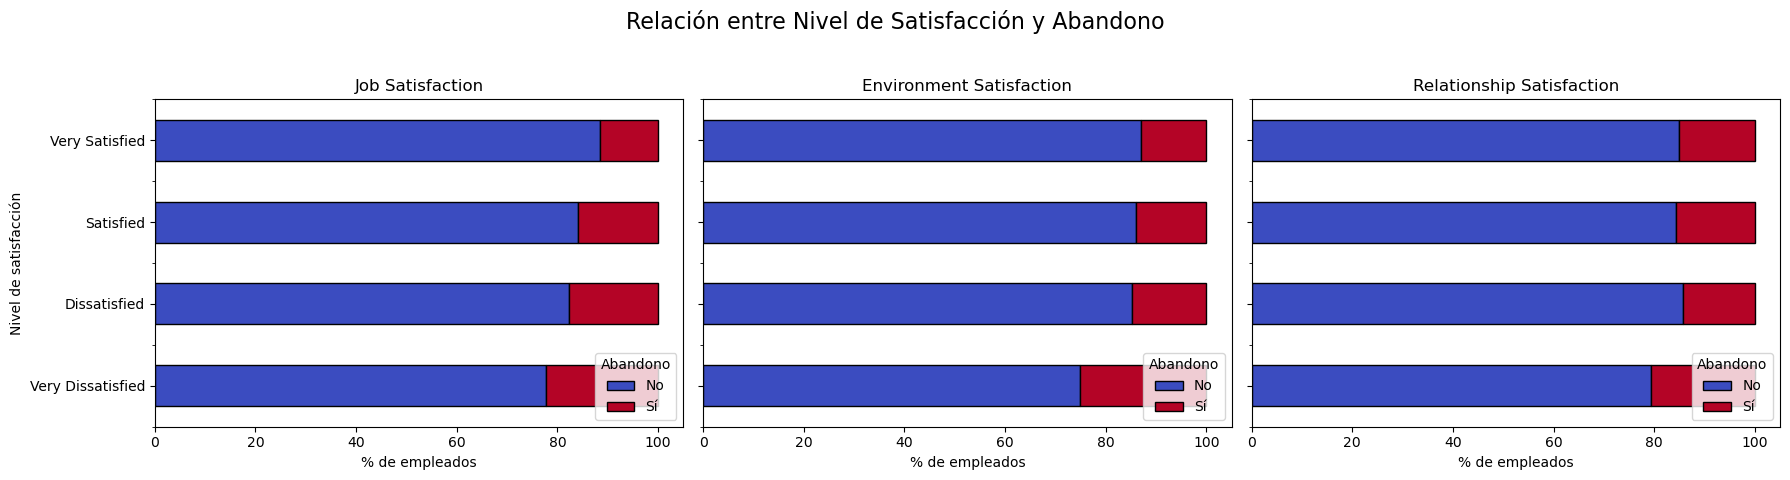

In [28]:
# GRAFICO 2: RELACION ENTRE NIVEL DE SATISFACCIÓN Y ABANDONO

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 5), sharey=True)

for i, var in enumerate(satisf_vars):
    tablas[var].loc[orden_niveles].plot(
        kind='barh',
        stacked=True,
        ax=axes[i],
        colormap='coolwarm',
        edgecolor='black'
    )
    
    axes[i].set_title(var.replace("_", " ").title())
    axes[i].set_xlabel('% de empleados')
    axes[i].set_ylabel('Nivel de satisfacción' if i == 0 else '')
    axes[i].legend(title='Abandono', loc='lower right')

plt.suptitle('Relación entre Nivel de Satisfacción y Abandono', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


📊 Conclusiones: Relación entre Satisfacción y Abandono

1. Satisfacción en el Puesto de Trabajo
Existe una clara correlación negativa entre la satisfacción en el puesto y la tasa de abandono.  
Los empleados que se sienten **"Muy insatisfechos"** son significativamente más propensos a abandonar la empresa, mientras que aquellos **"Muy satisfechos"** tienden a quedarse.  
👉 *Mejorar la satisfacción en el trabajo puede ser una palanca clave para reducir la rotación.*

2. Satisfacción con el Ambiente Laboral
La percepción del entorno laboral también influye directamente en la retención.  
Los trabajadores **insatisfechos con el ambiente** muestran tasas de abandono mucho más elevadas.  
👉 *Crear un entorno positivo, seguro y colaborativo puede contribuir significativamente a la fidelización del talento.*

 3. Satisfacción con las Relaciones Interpersonales
Aunque la influencia es algo más moderada, también se observa que quienes tienen **baja satisfacción con sus relaciones laborales** abandonan con mayor frecuencia.  
👉 *Fomentar la cohesión del equipo y la comunicación puede ayudar a reducir el desgaste emocional y el abandono.*

 📌 Conclusión General
> Los datos confirman que **los niveles de satisfacción tienen un impacto directo en la decisión de permanecer o abandonar la empresa**.  
> Mejorar el clima laboral, el entorno de trabajo y las relaciones personales es esencial para **reducir la rotación y aumentar la retención de talento** en la organización.


#### Impacto del Balance Vida-Trabajo y Horas Extra en la Retención del Personal

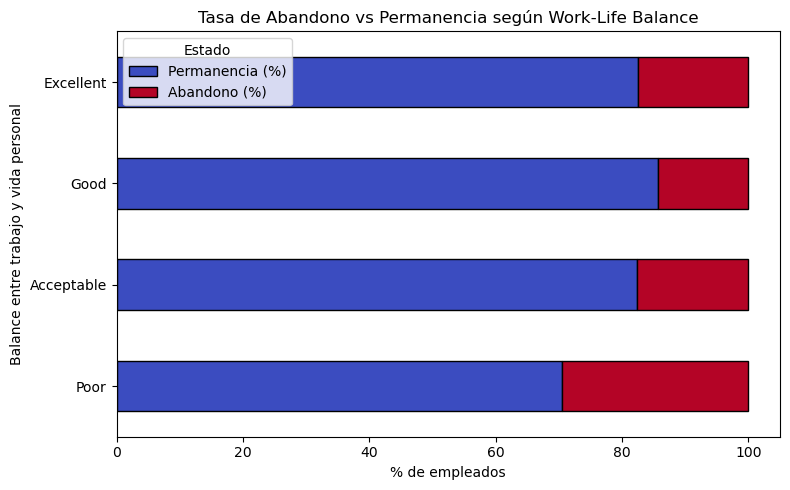

In [29]:
# GRAFICO 3: RELACION ENTRE BALANCE ENTRE TRABAJO Y VIDA PERSONAL Y ABANDONO

# Diccionario de etiquetas para Work-Life Balance
labels_wlb = {
    1: 'Poor',
    2: 'Acceptable',
    3: 'Good',
    4: 'Excellent'
}

# Crear una nueva columna con etiquetas legibles
df['WLB_Label'] = df['Work_Life_Balance'].map(labels_wlb)

# Calcular la tasa de abandono por nivel de balance
tasa_abandono_wlb = df.groupby('WLB_Label')['Attrition'].value_counts(normalize=True).unstack().fillna(0) * 100
tasa_abandono_wlb = tasa_abandono_wlb.rename(columns={'Yes': 'Abandono (%)', 'No': 'Permanencia (%)'})
tasa_abandono_wlb = tasa_abandono_wlb.loc[['Poor', 'Acceptable', 'Good', 'Excellent']]  # asegurar el orden

# Crear gráfico apilado
tasa_abandono_wlb.plot(kind='barh', stacked=True, figsize=(8, 5), colormap='coolwarm', edgecolor='black')

plt.xlabel('% de empleados')
plt.ylabel('Balance entre trabajo y vida personal')
plt.title('Tasa de Abandono vs Permanencia según Work-Life Balance')
plt.legend(title='Estado')
plt.tight_layout()
plt.show()


In [30]:
# TASA DE ABANDONO POR BALANCE ENTRE TRABAJO Y VIDA PERSONAL
# -----------------------------------------------------------------------

tasa_abandono_wlb = df.groupby('WLB_Label')['Attrition'].value_counts(normalize=True).unstack().fillna(0) * 100
tasa_abandono_wlb.rename(columns={"Yes": "Tasa Abandono (%)", "No": "Tasa Permanencia (%)"}, inplace=True)
# Definir el orden deseado
orden_personalizado = ['Poor', 'Acceptable', 'Good', 'Excellent']

# Reordenar la tabla
tasa_abandono_wlb = tasa_abandono_wlb.loc[orden_personalizado]

# Mostrar la tabla ordenada

display(tasa_abandono_wlb.round(2))


Attrition,Tasa Permanencia (%),Tasa Abandono (%)
WLB_Label,,
Poor,70.51,29.49
Acceptable,82.37,17.63
Good,85.69,14.31
Excellent,82.47,17.53


✅ Conclusiones principales:
Mayor abandono se observa en el grupo con "Poor" (pobre) balance, con más del 25% de empleados abandonando la empresa.

Aunque la mayoría de empleados se encuentran en la categoría "Good", su tasa de abandono es moderada, no la más alta.

Los niveles "Excellent" y "Acceptable" tienen tasas de abandono más bajas, especialmente el nivel más alto, que es donde más se retiene talento.

In [31]:
# TASA DE ABANDONO POR OVERTIME
tabla_ot = df.groupby('Over_Time')['Attrition'].value_counts(normalize=True).unstack().fillna(0) * 100
tabla_ot = tabla_ot.rename(columns={'Yes': 'Abandono (%)', 'No': 'Permanencia (%)'}).round(2)
display(tabla_ot)

Attrition,Permanencia (%),Abandono (%)
Over_Time,,
No,89.07,10.93
Unknown,84.10,15.90
Yes,69.60,30.40


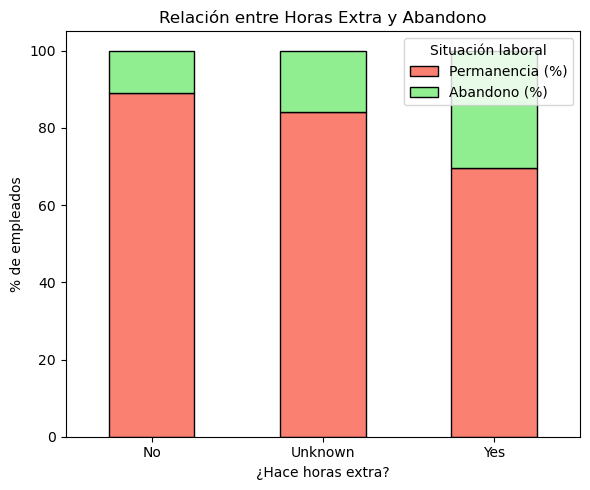

In [32]:
# GRAFICO 4: RELACION ENTRE BALANCE ENTRE HORAS EXTRA DE TRABAJO Y ABANDONO
tabla_ot.plot(kind='bar', stacked=True, color=['salmon', 'lightgreen'], figsize=(6, 5), edgecolor='black')
plt.title("Relación entre Horas Extra y Abandono")
plt.xlabel("¿Hace horas extra?")
plt.ylabel("% de empleados")
plt.legend(title="Situación laboral")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


Conclusiones:
Los empleados que hacen horas extra tienen una tasa de abandono aproximadamente 3 veces mayor que los que no hacen.

Este patrón puede indicar sobrecarga, desmotivación o falta de conciliación.

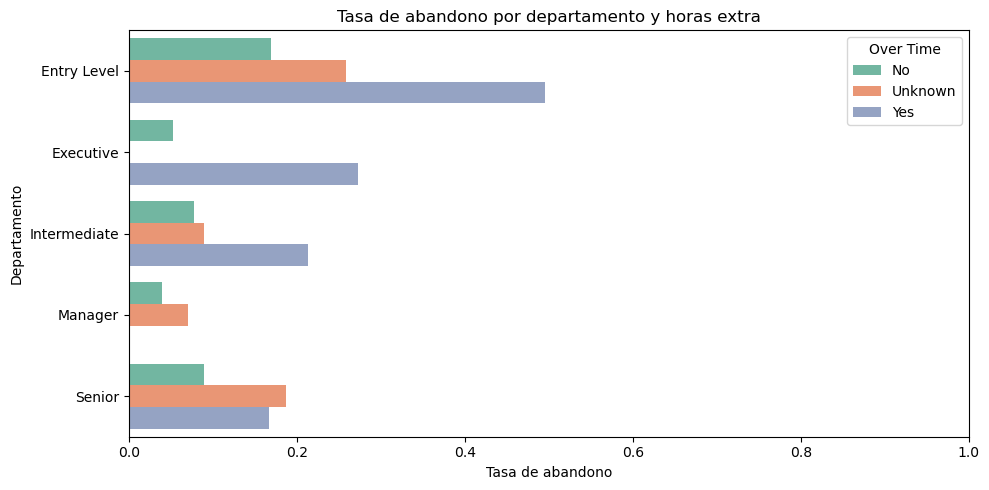

In [33]:
# GRAFICO 5: RELACION ENTRE NIVELES, HORAS EXTRA y ABANDONO

# 1. Convertimos Attrition a 0/1 para poder calcular tasa
df['Attrition_Flag'] = df['Attrition'].map({'Yes': 1, 'No': 0})

df_ot = df.groupby(['Job_Level', 'Over_Time'])['Attrition_Flag'].mean().reset_index()

# Gráfico
plt.figure(figsize=(10, 5))
sns.barplot(data=df_ot, x='Attrition_Flag', y='Job_Level', hue='Over_Time', palette='Set2')
plt.title("Tasa de abandono por departamento y horas extra")
plt.xlabel("Tasa de abandono")
plt.ylabel("Departamento")
plt.xlim(0, 1)
plt.legend(title='Over Time')
plt.tight_layout()
plt.show()

df_ot = df.groupby(['Job_Level', 'Over_Time'])['Attrition_Flag'].mean().reset_index()


### Conclusiones del gráfico: Tasa de abandono por departamento y horas extra

- Los empleados que hacen horas extra presentan una mayor tasa de abandono en todos los niveles.
- El abandono es especialmente alto en el nivel Entry Level cuando se realizan horas extra (más del 40%).
- Intermediate y Executive también muestran tasas elevadas con horas extra.
- Los niveles Manager y Executive tienen tasas de abandono bajas, pero no nulas.
- La categoría "Unknown" en OverTime muestra abandono significativo, lo que sugiere posible falta de control en el registro de jornada.


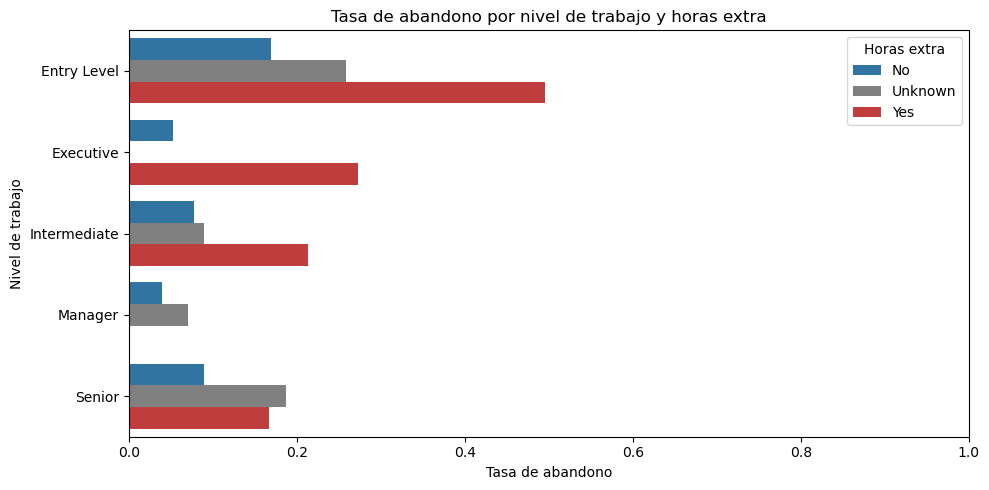

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

# Mapear abandono a numérico
df['Attrition_Flag'] = df['Attrition'].map({'Yes': 1, 'No': 0})

# Agrupar
df_ot = df.groupby(['Job_Level', 'Over_Time'])['Attrition_Flag'].mean().reset_index()

# Diccionario de colores personalizado
palette = {
    'Yes': '#d62728',   # rojo
    'No': '#1f77b4',    # azul
    'Unknown': 'gray'   # opcional, por si aparece
}

# Gráfico
plt.figure(figsize=(10, 5))
sns.barplot(
    data=df_ot,
    x='Attrition_Flag',
    y='Job_Level',
    hue='Over_Time',
    palette=palette
)

plt.title("Tasa de abandono por nivel de trabajo y horas extra")
plt.xlabel("Tasa de abandono")
plt.ylabel("Nivel de trabajo")
plt.xlim(0, 1)
plt.legend(title='Horas extra')
plt.tight_layout()
plt.show()


#### Entorno Laboral

1. ¿El teletrabajo ayuda a retener empleados? REVISAR GRAFICO

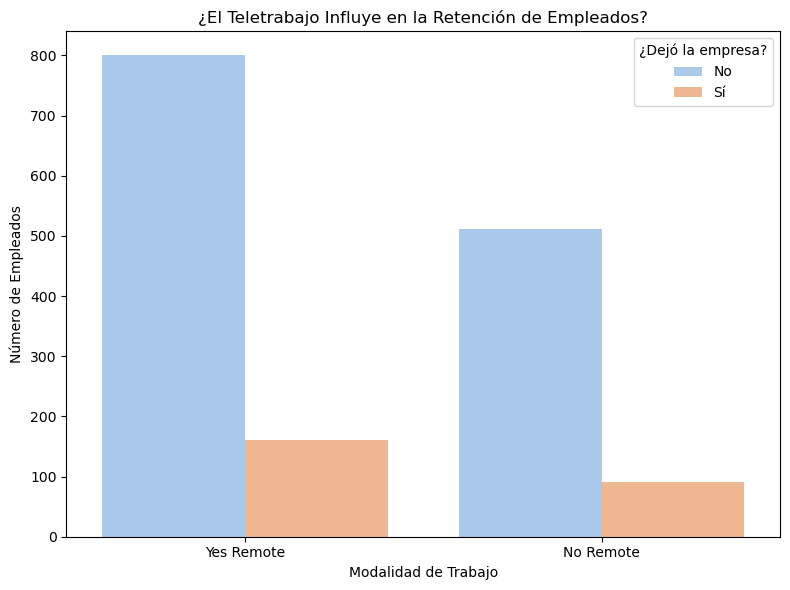

In [35]:

traduccion_remoto = {'Yes': 'Teletrabajo', 'No': 'Presencial'}
traduccion_attrition = {'Yes': 'Sí', 'No': 'No'}
# Copiar el DataFrame original
df_plot = df.copy()
# Aplicar las traducciones
df_plot['Remote_Work'] = df_plot['Remote_Work'].replace(traduccion_remoto)
df_plot['Attrition'] = df_plot['Attrition'].replace(traduccion_attrition)
plt.figure(figsize=(8, 6))
sns.countplot(data=df_plot, x='Remote_Work', hue='Attrition', palette='pastel')
plt.title('¿El Teletrabajo Influye en la Retención de Empleados?')
plt.xlabel('Modalidad de Trabajo')
plt.ylabel('Número de Empleados')
plt.legend(title='¿Dejó la empresa?')
plt.tight_layout()
plt.show()

¿Influye el Teletrabajo en la Satisfacción y Retención?
Este gráfico compara el nivel de satisfacción laboral entre quienes se quedaron y quienes se fueron. Aunque el título sugiere una conexión con el teletrabajo, esta variable no se desglosa directamente en el gráfico.

Empleados que se quedaron:
Predominan los niveles altos de satisfacción ("Muy Satisfecho" y "Satisfecho"), con más de 400 empleados en estas categorías.

Empleados que se fueron:
La distribución es más uniforme: todos los niveles de satisfacción tienen entre 50 y 70 empleados que renunciaron, incluyendo "Muy Satisfechos".

Conclusión: La satisfacción laboral sigue estando correlacionada con la retención. Sin embargo, el hecho de que empleados satisfechos también se vayan sugiere que la satisfacción no es suficiente por sí sola. Aunque el título menciona el teletrabajo, sería necesario incluir esa variable explícitamente para extraer conclusiones al respecto.

`Implicación en el trabajo`

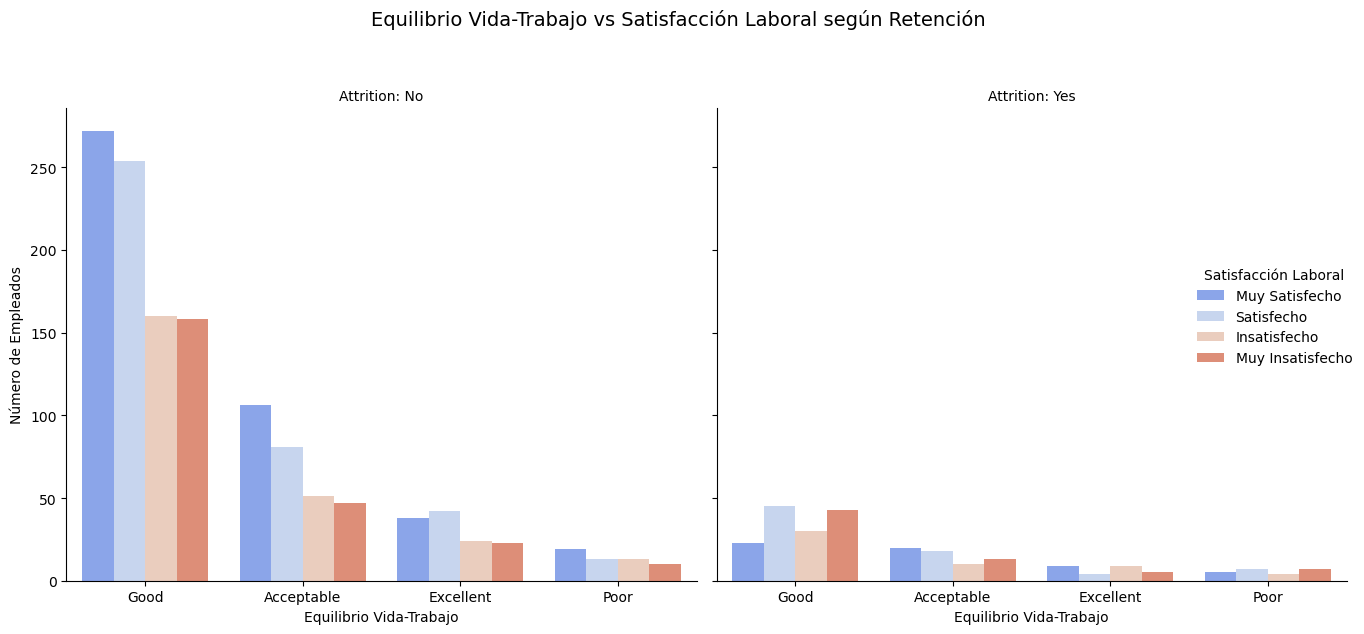

In [36]:
# 2. ¿La implicación laboral (Job_Involvement) está relacionada con la retención?
# Traducir y ordenar Job_Sat_Cat si no está ya hecho
traduccion = {
    'Very Dissatisfied': 'Muy Insatisfecho',
    'Dissatisfied': 'Insatisfecho',
    'Satisfied': 'Satisfecho',
    'Very Satisfied': 'Muy Satisfecho'
}

df_plot = df.copy()
df_plot['Job_Sat_Cat'] = df_plot['Job_Sat_Cat'].replace(traduccion)

orden_satisfaccion = ['Muy Satisfecho', 'Satisfecho', 'Insatisfecho', 'Muy Insatisfecho']
df_plot['Job_Sat_Cat'] = pd.Categorical(df_plot['Job_Sat_Cat'], categories=orden_satisfaccion, ordered=True)

# Crear gráfico con FacetGrid para cruzar también con Attrition
g = sns.catplot(
    data=df_plot,
    kind='count',
    x='Work_Balance_Cat',
    hue='Job_Sat_Cat',
    col='Attrition',
    palette='coolwarm',
    height=6,
    aspect=1
)

g.set_titles('Attrition: {col_name}')
g.set_axis_labels('Equilibrio Vida-Trabajo', 'Número de Empleados')
g._legend.set_title('Satisfacción Laboral')
g.fig.suptitle('Equilibrio Vida-Trabajo vs Satisfacción Laboral según Retención', fontsize=14, y=1.05)

plt.tight_layout()
plt.show()


 Equilibrio Vida-Trabajo y Satisfacción Laboral según Retención
Este gráfico muestra la relación entre el equilibrio vida-trabajo, la satisfacción laboral y la retención de empleados, separando los datos entre quienes se fueron y quienes se quedaron.

Empleados que se quedaron:
Predominan percepciones de equilibrio "Good" o "Acceptable", con altos niveles de satisfacción laboral ("Muy Satisfecho" y "Satisfecho"). Incluso en extremos como "Excellent" o "Poor", la mayoría se mantiene satisfecha.

Empleados que se fueron:
Aunque hay empleados "Muy Satisfechos" que se fueron, el grupo muestra una mayor proporción de personas "Insatisfechas" o "Muy Insatisfechas", incluso entre aquellos con equilibrio vida-trabajo "Excellent".

Conclusión: Un buen equilibrio entre vida personal y trabajo, junto con una alta satisfacción laboral, está fuertemente asociado con la retención. Por el contrario, la insatisfacción, aunque se dé en contextos de equilibrio aceptable, parece ser un factor clave en la salida de empleados.

`Evaluación del desempeño`

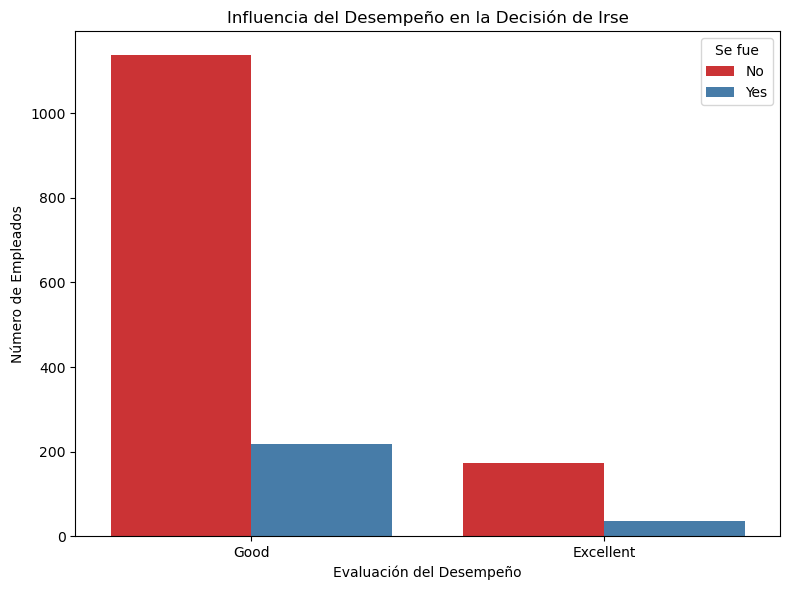

In [37]:
# 3. ¿Influye la evaluación del desempeño en la decisión de irse? 

plt.figure(figsize=(8,6))
sns.countplot(data=df, x='Performance_Rat_Cat', hue='Attrition', palette='Set1')

plt.title('Influencia del Desempeño en la Decisión de Irse')
plt.xlabel('Evaluación del Desempeño')
plt.ylabel('Número de Empleados')
plt.legend(title='Se fue')
plt.tight_layout()
plt.show()


Desempeño y Decisión de Irse
Esta gráfica analiza si la evaluación de desempeño influye en la decisión de permanencia, comparando empleados con desempeño "Good" y "Excellent".

Desempeño "Good":
La gran mayoría permanece en la empresa, con una proporción relativamente pequeña de salidas.

Desempeño "Excellent":
Aunque hay menos empleados en esta categoría, la mayoría también se queda. Solo un número reducido de empleados con desempeño excelente se va.

Conclusión: Los empleados de alto rendimiento tienden a permanecer en la organización, lo que sugiere que la empresa logra retener a sus talentos más destacados.

### 🧳 Características del Puesto y Entorno Laboral

#### Distance_From_Home", "Years_At_Company", "Years_Current_Manager"

In [38]:
# Convertir columnas numéricas
cols_numeric = ["Distance_From_Home", "Years_At_Company", "Years_Current_Manager"]
df[cols_numeric] = df[cols_numeric].apply(pd.to_numeric, errors='coerce')

# Convertir 'Attrition' a categoría
df["Attrition"] = df["Attrition"].astype("category")

# Limpiar datos
df_clean = df.dropna(subset=cols_numeric + ["Attrition"])

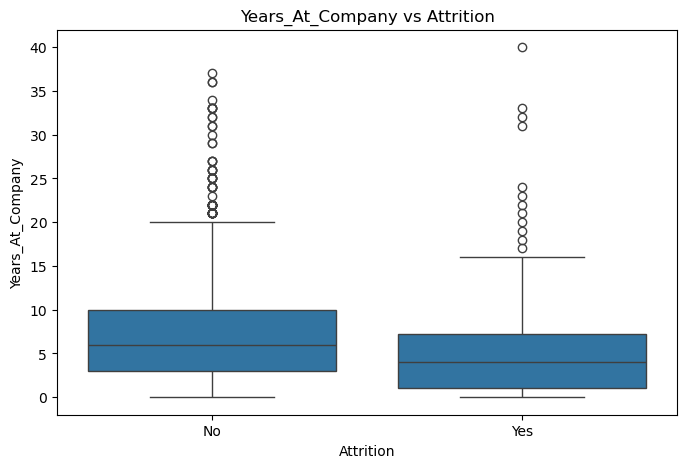

In [39]:
# 1. Years_At_Company vs Attrition
plt.figure(figsize=(8, 5))
sns.boxplot(data=df_clean, x="Attrition", y="Years_At_Company")
plt.title("Years_At_Company vs Attrition")
plt.xlabel("Attrition")
plt.ylabel("Years_At_Company")
plt.show()


Este gráfico muestra la distribución de los años que los empleados han estado en la empresa, separados por quienes se han ido (Yes) y quienes se quedaron (No).

Se observa que los empleados que se quedaron (No) tienden a tener una mediana más alta en años de antigüedad (~6 años).

Los empleados que se fueron (Yes) tienen una mediana más baja (~3 años), y en general, menos años en la empresa.

✅Conclusión:
La rotación es mayor en empleados con menos años en la empresa, especialmente en los primeros 3 a 5 años. Esto indica que la retención en los primeros años es un desafío importante.

`Años en el mismo puesto`

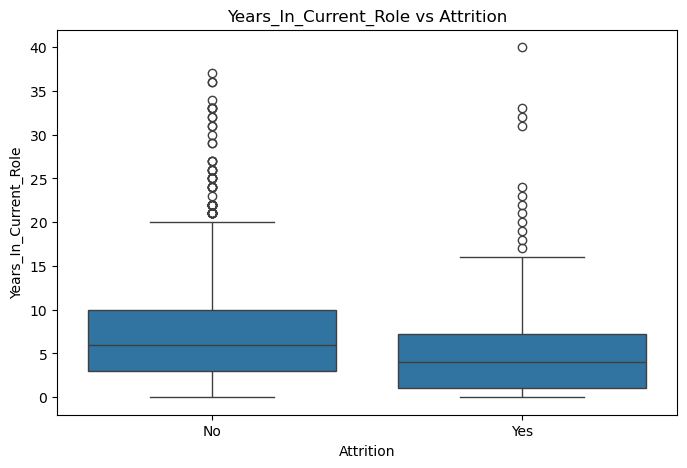

In [40]:
# 2. Years_In_Current_Role vs Attrition
plt.figure(figsize=(8, 5))
sns.boxplot(data=df_clean, x="Attrition", y="Years_At_Company")
plt.title("Years_In_Current_Role vs Attrition")
plt.xlabel("Attrition")
plt.ylabel("Years_In_Current_Role")
plt.show()

Descripción:
Muestra los años que los empleados han estado en su rol actual, también separados por Attrition.

La mediana de años en el rol es más baja para los que se fueron (~2.5 años) frente a los que se quedaron (~5 años).

Se nota una distribución más concentrada en valores bajos para los que se fueron.

✅Conclusión:
La rotación es más común entre empleados con menos tiempo en su puesto actual. Esto podría deberse a falta de adaptación, desmotivación temprana, o falta de oportunidades de crecimiento en ese rol.

`Años con el mismo jefe`

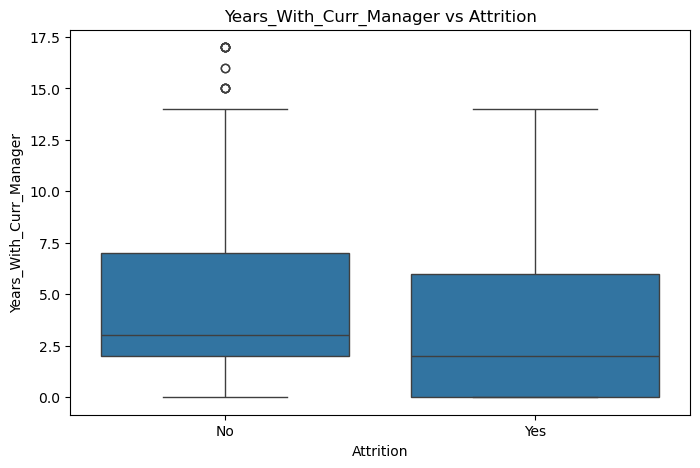

In [41]:
# 3. Years_With_Curr_Manager vs Attrition
plt.figure(figsize=(8, 5))
sns.boxplot(data=df_clean, x="Attrition", y="Years_Current_Manager")
plt.title("Years_With_Curr_Manager vs Attrition")
plt.xlabel("Attrition")
plt.ylabel("Years_With_Curr_Manager")
plt.show()

Descripción:
Este gráfico presenta cuántos años han estado los empleados con su jefe actual.

Los empleados que se fueron han pasado generalmente menos tiempo con su jefe (~1.5 a 2 años).

Los que se quedaron tienen una mediana mayor (~3 años) y una dispersión más amplia.

✅Conclusión:
Los empleados con menos años bajo el mismo manager tienden a abandonar más. Esto puede reflejar relaciones débiles con la supervisión, falta de liderazgo eficaz, o poca confianza desarrollada.

### 💸 Compensación Económica y Desarrollo Profesional

#### Salario

C:\Users\noemi\AppData\Local\Temp\ipykernel_3496\2505893081.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  income_attrition = df.groupby('Income_Group')['Attrition_Flag'].mean().reset_index()
C:\Users\noemi\AppData\Local\Temp\ipykernel_3496\2505893081.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=income_attrition, x='Income_Group', y='Attrition_Flag', palette='YlOrRd')


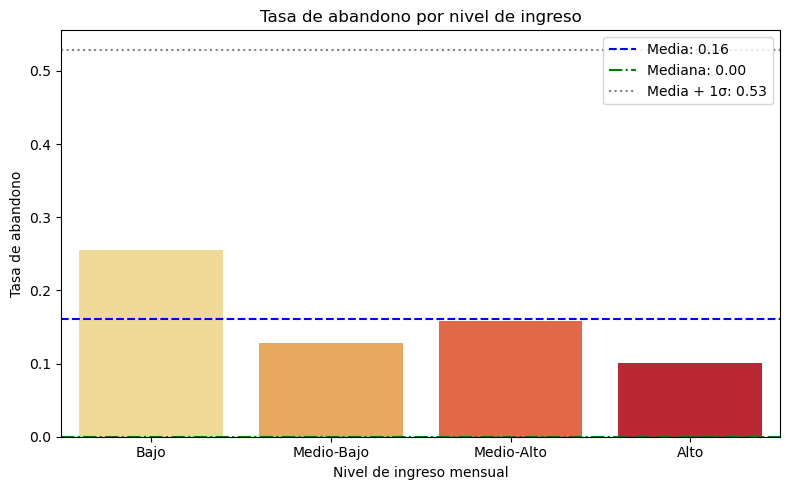

In [42]:
# Crear grupos de ingreso por cuartiles
df['Income_Group'] = pd.qcut(df['Monthly_Income'], q=4, labels=['Bajo', 'Medio-Bajo', 'Medio-Alto', 'Alto'])

# Asegurar que Attrition_Flag es numérico
df['Attrition_Flag'] = df['Attrition'].map({'Yes': 1, 'No': 0})
df['Attrition_Flag'] = df['Attrition_Flag'].astype(int)

# Agrupar por Income_Group y calcular tasa de abandono
income_attrition = df.groupby('Income_Group')['Attrition_Flag'].mean().reset_index()

# Cálculos estadísticos globales (tasa general)
mean_rate = df['Attrition_Flag'].mean()
median_rate = df['Attrition_Flag'].median()
std_rate = df['Attrition_Flag'].std()

# Gráfico
plt.figure(figsize=(8, 5))
sns.barplot(data=income_attrition, x='Income_Group', y='Attrition_Flag', palette='YlOrRd')

# Líneas horizontales: media, mediana y desviación estándar (referencia)
plt.axhline(mean_rate, color='blue', linestyle='--', label=f"Media: {mean_rate:.2f}")
plt.axhline(median_rate, color='green', linestyle='-.', label=f"Mediana: {median_rate:.2f}")
plt.axhline(mean_rate + std_rate, color='gray', linestyle=':', label=f"Media + 1σ: {(mean_rate + std_rate):.2f}")

# Etiquetas
plt.title("Tasa de abandono por nivel de ingreso")
plt.xlabel("Nivel de ingreso mensual")
plt.ylabel("Tasa de abandono")
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()


### ✅Conclusiones: Relación entre ingresos y abandono

- El grupo con ingresos bajos presenta la mayor tasa de abandono. Es esperable por la menor compensación.
- El grupo medio-alto muestra una tasa de abandono casi tan alta como el grupo bajo.
-> Anomalía: podría deberse a estrés, falta de promoción o alta movilidad profesional.
- El grupo alto tiene la tasa de abandono más baja, lo que refuerza la idea de que un buen salario retiene talento.


### Análisis de empleados con ingresos Medio-Alto y alta tasa de abandono

 1. Horas extra:
 - Filtramos por Income_Group == "Medio-Alto" y cruzamos con Over_Time vs Attrition.
 - Buscamos si el abandono está relacionado con la sobrecarga laboral.

 2. Tiempo sin promoción:
 - Cruzamos Years_Since_Last_Promotion vs Attrition para este grupo.
 - Evaluamos si hay sensación de estancamiento profesional.

 3. Satisfacción laboral:
 - Cruzamos Job_Satisfaction vs Attrition para el grupo de ingreso medio-alto.
 - Analizamos si la motivación es baja a pesar del salario.



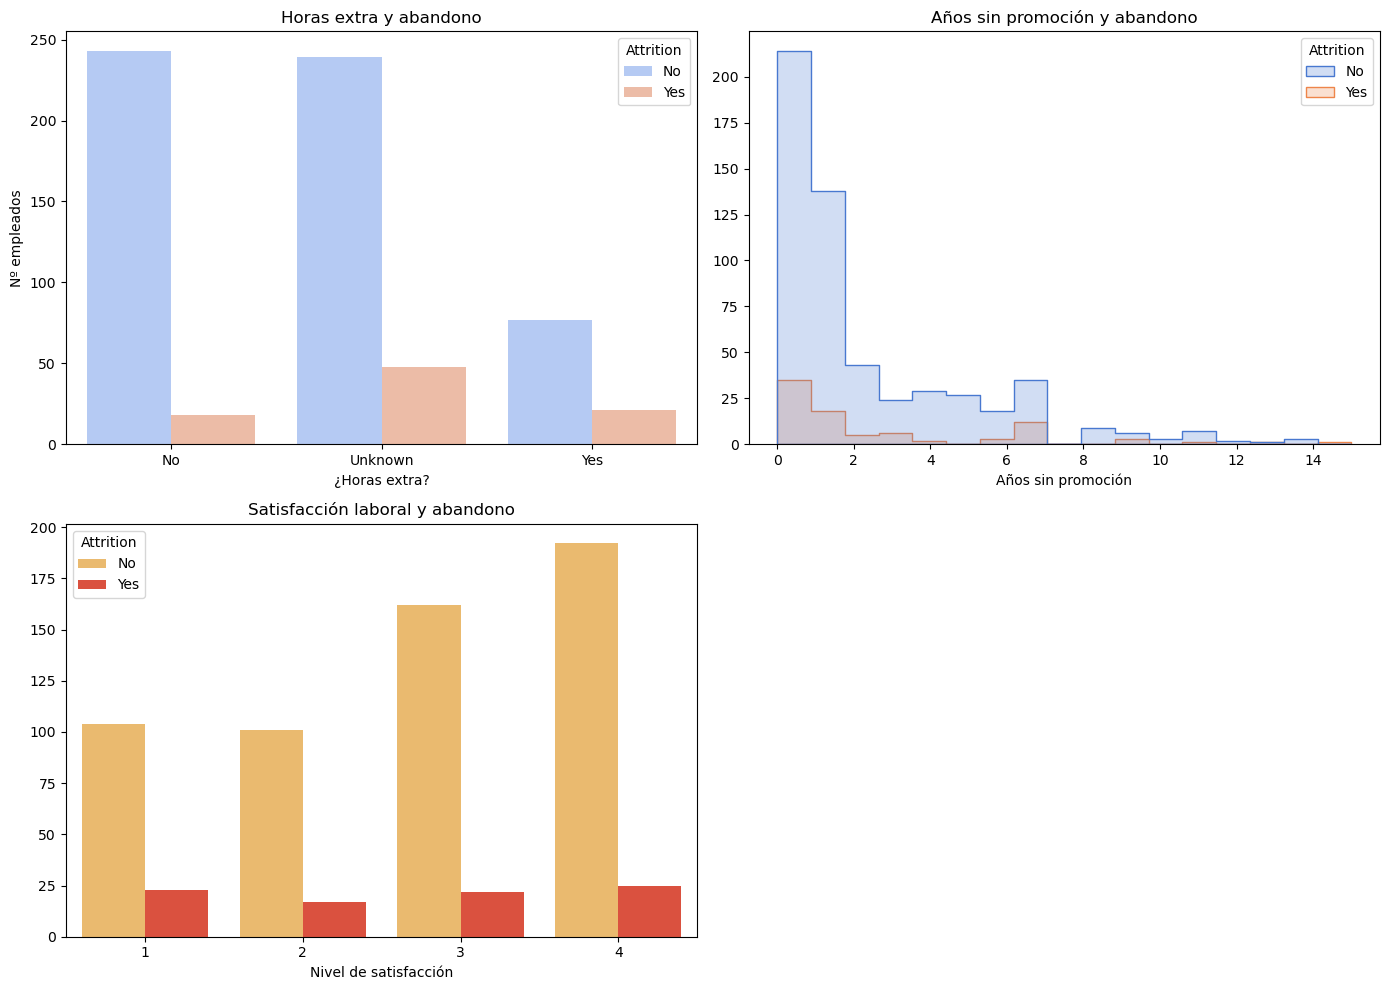

In [43]:
# Aseguramos que Income_Group existe
bins = [0, 3000, 5000, 8000, df['Monthly_Income'].max()]
labels = ['Bajo', 'Medio', 'Medio-Alto', 'Alto']
df['Income_Group'] = pd.cut(df_clean['Monthly_Income'], bins=bins, labels=labels, include_lowest=True)

# Filtramos grupo "Medio-Alto"
medio_alto = df[df['Income_Group'] == 'Medio-Alto']
# Crear figura con 2x2 subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# (0, 0) Over_Time vs Attrition
sns.countplot(data=medio_alto, x='Over_Time', hue='Attrition', palette='coolwarm', ax=axes[0, 0])
axes[0, 0].set_title("Horas extra y abandono")
axes[0, 0].set_xlabel("¿Horas extra?")
axes[0, 0].set_ylabel("Nº empleados")

# (0, 1) Years_Since_Last_Promotion vs Attrition
sns.histplot(data=medio_alto, x='Years_Since_Last_Promotion', hue='Attrition',
             element='step', common_norm=False, palette='muted', ax=axes[0, 1])
axes[0, 1].set_title("Años sin promoción y abandono")
axes[0, 1].set_xlabel("Años sin promoción")
axes[0, 1].set_ylabel("")

# (1, 0) Job_Satisfaction vs Attrition
sns.countplot(data=medio_alto, x='Job_Satisfaction', hue='Attrition', palette='YlOrRd', ax=axes[1, 0])
axes[1, 0].set_title("Satisfacción laboral y abandono")
axes[1, 0].set_xlabel("Nivel de satisfacción")
axes[1, 0].set_ylabel("")

# (1, 1) Dejar vacío
axes[1, 1].axis('off')

plt.tight_layout()
plt.show()


### ✅ Conclusiones de la exploración para el grupo de ingresos medio-alto

 1. Horas extra y abandono:
 - Una parte importante de quienes se marchan hacen horas extra.
 - La sobrecarga laboral puede estar influyendo en la decisión de abandonar, incluso con buen salario.

 2. Años sin promoción:
 - Muchos abandonos se dan tras más de 2 o 3 años sin ascensos.
 - Posible estancamiento o falta de reconocimiento.

 3. Satisfacción laboral:
 - Mayor abandono en niveles bajos de satisfacción (1 y 2).
 - El salario no compensa una mala experiencia laboral.

 Interpretación general:
 - Hay sobrecarga sin compensación emocional ni crecimiento.
 - No perciben un camino de desarrollo dentro de la empresa.
 - No están satisfechos, y eso pesa más que el sueldo.

 ➕ Conclusión clave:
 - La retención no depende solo del salario, sino del equilibrio entre motivación, reconocimiento y bienestar.


#### Aumento Salarial

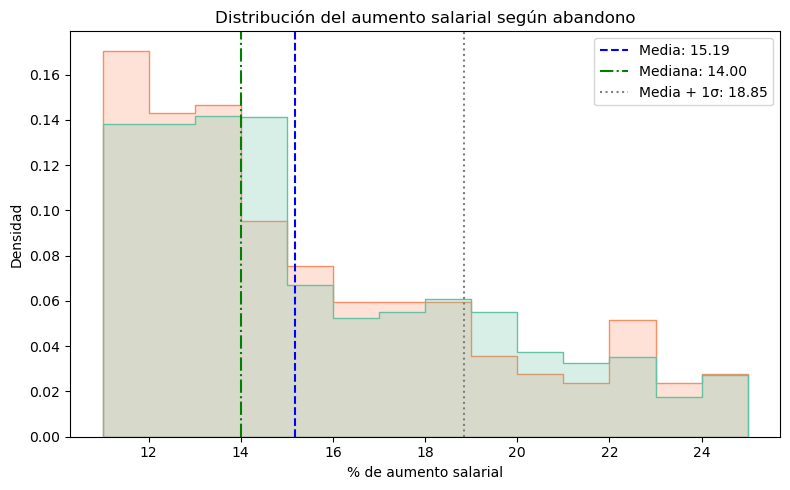

In [44]:
# Cálculos globales para la variable analizada
mean = df['Percent_Salary_Hike'].mean()
median = df['Percent_Salary_Hike'].median()
std = df['Percent_Salary_Hike'].std()

# Histograma comparativo
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='Percent_Salary_Hike', hue='Attrition',
             element='step', stat='density', common_norm=False, palette='Set2')

# Líneas verticales
plt.axvline(mean, color='blue', linestyle='--', label=f"Media: {mean:.2f}")
plt.axvline(median, color='green', linestyle='-.', label=f"Mediana: {median:.2f}")
plt.axvline(mean + std, color='gray', linestyle=':', label=f"Media + 1σ: {(mean + std):.2f}")

# Etiquetas
plt.title("Distribución del aumento salarial según abandono")
plt.xlabel("% de aumento salarial")
plt.ylabel("Densidad")
plt.legend()
plt.tight_layout()
plt.show()


### ✅ Conclusiones sobre aumentos salariales y abandono

 - La mayoría de empleados (se queden o se vayan) recibieron aumentos moderados, entre el 12% y 15%.
 - Los que permanecen muestran más casos con aumentos altos (18% o más).
 - Los que se van tienden a concentrarse ligeramente en los aumentos más bajos (11% a 13%).

 Interpretación:
 - Aunque la diferencia no es extrema, hay una tendencia clara.
 - Mejores aumentos se asocian con mayor retención.
 - El aumento salarial ayuda, pero no es suficiente si no se acompaña de promoción, buen clima y beneficios.


#### Stock option

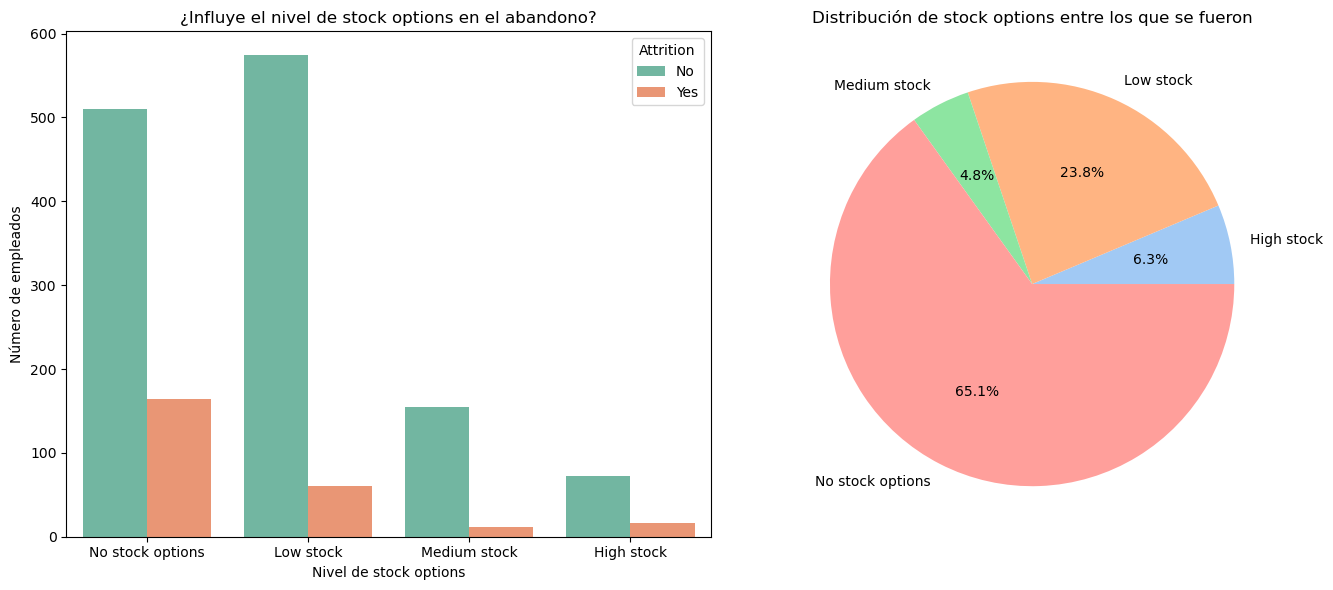

In [45]:

# Datos filtrados para el pieplot
stock_data = df[df['Attrition'] == 'Yes']['Stock_Option_Level'].value_counts().sort_index()

# Grafica de barras
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
sns.countplot(ax=axes[0], x='Stock_Option_Level', hue='Attrition', data=df, palette='Set2')
axes[0].set_title("¿Influye el nivel de stock options en el abandono?")
axes[0].set_xlabel("Nivel de stock options")
axes[0].set_ylabel("Número de empleados")

# Gráfico de pastel
axes[1].pie(stock_data, labels=stock_data.index, autopct='%1.1f%%', colors=sns.color_palette('pastel'))
axes[1].set_title("Distribución de stock options entre los que se fueron")

plt.tight_layout()
plt.show()


### ✅ Conclusiones sobre stock options y abandono

 - El abandono es más alto en empleados con nivel 0 de stock options.
 - A medida que el nivel de stock options aumenta (1, 2, 3), la proporción de empleados que se quedan también sube.
 - Más del 70% de los que abandonan no tienen ningún tipo de participación accionaria.

 Pistas para profundizar:
 1. ¿Qué perfiles tienen stock options? ¿Son directivos o estratégicos?
 2. ¿Tienen menos abandono solo por antigüedad, salario o promociones?
 3. ¿Se podrían ofrecer stock options a perfiles con alta rotación como incentivo?

 Conclusión estratégica:
 - Las stock options parecen tener efecto positivo en la retención.
 - Actualmente están concentradas en una minoría.
 - Un plan más inclusivo o progresivo podría reducir la rotación en perfiles clave.




### 👤 Factores Demográficos y Experiencia

#### 1. ¿Los empleados más jóvenes se marchan más?

In [46]:
# Agrupamos por edad y calculamos % de empleados que se van:
attrition_by_age = df.groupby('Age')['Attrition'].value_counts(normalize=True).unstack().fillna(0) #Convierte la agrupación en tabla donde Yes y No son columnas, para verlo mejor
tasa_abandono_edad = attrition_by_age['Yes'] * 100
tasa_abandono_edad

Age
18    50.000000
19    66.666667
20    54.545455
21    46.666667
22    31.250000
23    26.666667
24    25.925926
25    23.076923
26    30.952381
27     5.769231
28    29.411765
29    25.675676
30    14.062500
31    23.456790
32    17.187500
33    21.311475
34    12.345679
35    13.414634
36     8.450704
37    11.538462
38     3.333333
39    13.636364
40     8.620690
41    18.604651
42     4.081633
43     5.405405
44    17.647059
45     4.444444
46    16.216216
47    14.814815
48    10.526316
49     8.000000
50    16.129032
51    10.000000
52    21.052632
53    10.526316
54     0.000000
55    16.666667
56    18.750000
57     0.000000
58    35.714286
59     0.000000
60     0.000000
Name: Yes, dtype: float64

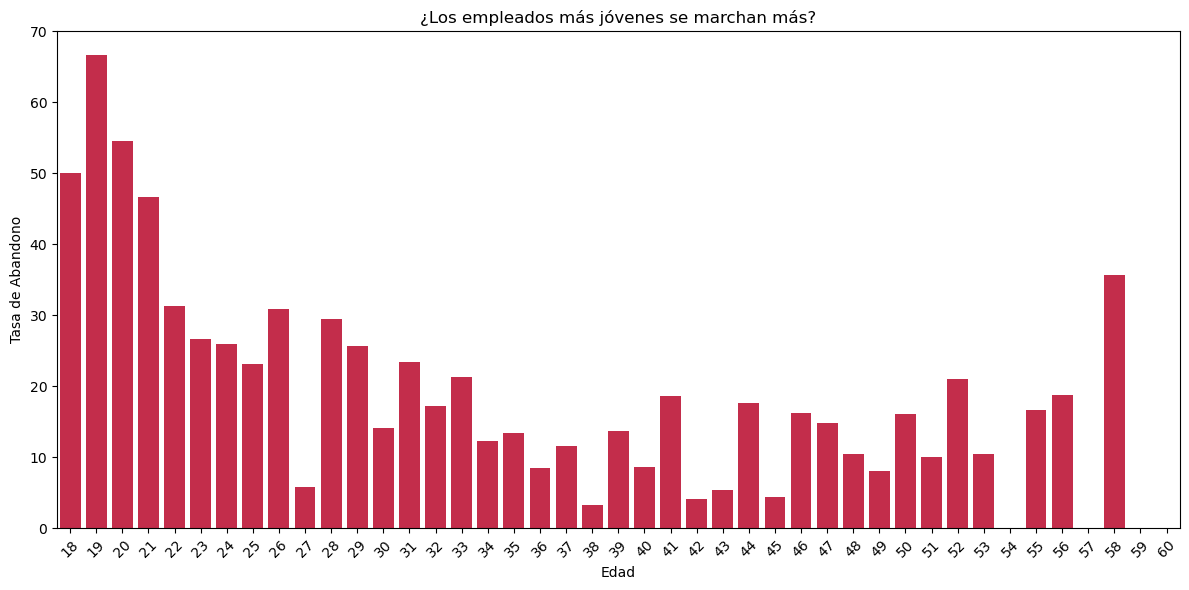

In [47]:
plt.figure(figsize=(12, 6))
sns.barplot(x=tasa_abandono_edad.index, y=tasa_abandono_edad.values, color='crimson')
plt.title('¿Los empleados más jóvenes se marchan más?')
plt.xlabel('Edad')
plt.ylabel('Tasa de Abandono')
plt.xticks(rotation=45)  # Rota etiquetas si hay muchas edades
plt.tight_layout()
plt.show()

#### Gráfica de edad pero dividiendo por generación

In [48]:
# Función para asignar generación según edad
def clasificar_generacion(edad):
    if edad <= 25:
        return 'Gen Z'
    elif 26<= edad <= 30:
        return 'Centennials'
    elif 30 <= edad <= 40:
        return 'Millennial'
    elif 40 <= edad <= 50:
        return 'Gen X'
    else:
        return 'Boomers'

# Crear columna de generación
df['Generacion'] = df['Age'].apply(clasificar_generacion)

In [49]:
# Calcular proporción de abandono por generación
attrition_by_gen = df.groupby('Generacion')['Attrition'].value_counts(normalize=True).unstack().fillna(0)

# Extraer tasa de abandono ('Yes') en porcentaje
tasa_abandono_gen = attrition_by_gen['Yes'] * 100

C:\Users\noemi\AppData\Local\Temp\ipykernel_3496\159379037.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=tasa_abandono_gen.index, y=tasa_abandono_gen.values, palette='pastel')


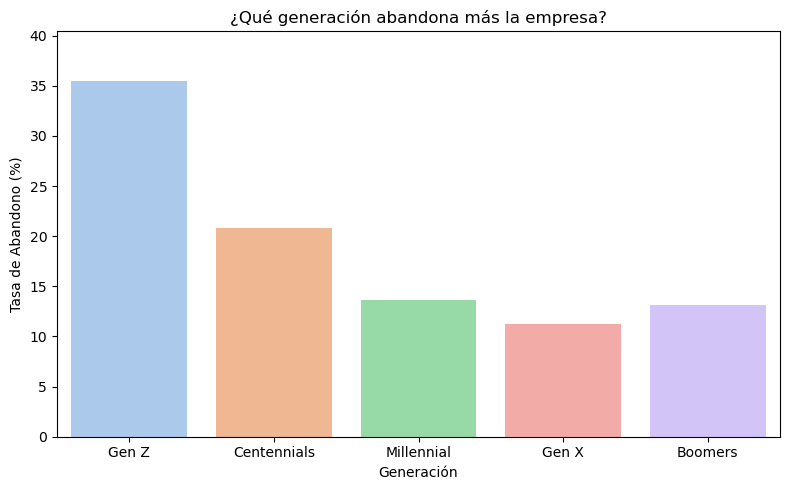

In [50]:
# Orden personalizado de generaciones
orden_gen = ['Gen Z', 'Centennials', 'Millennial', 'Gen X', 'Boomers']

# Reordenar las tasas según el orden deseado
tasa_abandono_gen = tasa_abandono_gen.reindex(orden_gen)

# Gráfico
plt.figure(figsize=(8, 5))
sns.barplot(x=tasa_abandono_gen.index, y=tasa_abandono_gen.values, palette='pastel')

plt.title('¿Qué generación abandona más la empresa?')
plt.xlabel('Generación')
plt.ylabel('Tasa de Abandono (%)')
plt.ylim(0, tasa_abandono_gen.max() + 5)
plt.tight_layout()
plt.show()

#### 2. ¿Hay diferencias de rotación entre géneros?

In [51]:
# Agrupamos por 'Gender' y contamos la proporción de 'Attrition' = 'Yes' y 'No'
attrition_by_gender = df.groupby('Gender')['Attrition'].value_counts(normalize=True).unstack().fillna(0)

# Sacamos solo la tasa de abandono (la columna 'Yes') y la multiplicamos por 100 para % (opcional)
tasa_abandono = attrition_by_gender['Yes'] * 100
tasa_abandono_genero = (tasa_abandono).round(2)
tasa_abandono_genero

Gender
Female    14.95
Male      16.90
Name: Yes, dtype: float64

C:\Users\noemi\AppData\Local\Temp\ipykernel_3496\2041447663.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=tasa_abandono_genero.index, y=tasa_abandono_genero.values, palette='mako')


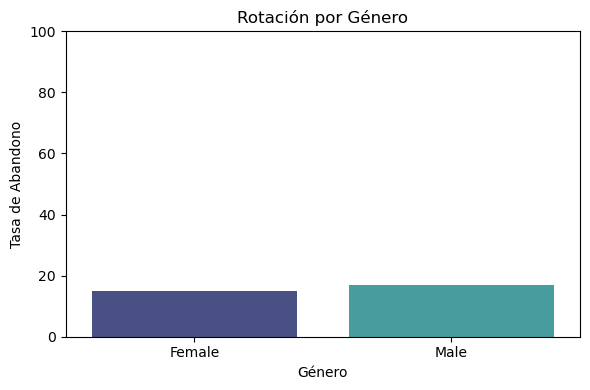

In [52]:

plt.figure(figsize=(6, 4))
sns.barplot(x=tasa_abandono_genero.index, y=tasa_abandono_genero.values, palette='mako')

plt.title('Rotación por Género')
plt.ylabel('Tasa de Abandono')
plt.xlabel('Género')
plt.ylim(0, 100)
plt.tight_layout()
plt.show()

#### El mismo gráfico pero añadiendo el porcentaje del 'No'

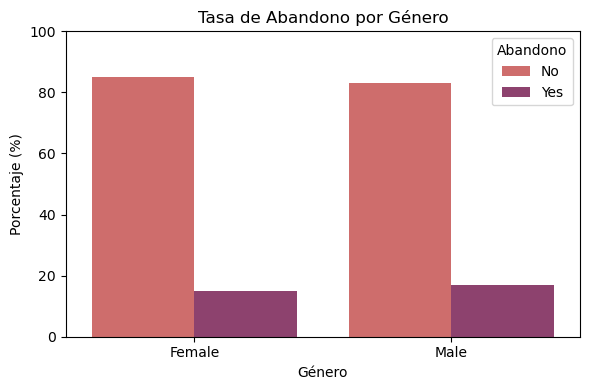

In [53]:
# Agrupar y calcular proporciones normalizadas
attrition_by_gender = df.groupby('Gender')['Attrition'].value_counts(normalize=True).unstack().fillna(0)

# Resetear índice para usar en seaborn
df_plot = attrition_by_gender.reset_index().melt(id_vars='Gender', var_name='Attrition', value_name='Proporcion')

# Convertir a porcentaje
df_plot['Proporcion'] = df_plot['Proporcion'] * 100

# Gráfico
plt.figure(figsize=(6, 4))
sns.barplot(x='Gender', y='Proporcion', hue='Attrition', data=df_plot, palette='flare')

# Ajustes estéticos
plt.title('Tasa de Abandono por Género')
plt.xlabel('Género')
plt.ylabel('Porcentaje (%)')
plt.ylim(0, 100)
plt.legend(title='Abandono')
plt.tight_layout()
plt.show()

#### 3. ¿El estado civil influye en la rotación?

In [54]:
# Agrupamos por 'Marital_Status' y calculamos proporción de 'Attrition' (Yes/No)
attrition_by_marital = df.groupby('Marital_Status')['Attrition'].value_counts(normalize=True).unstack().fillna(0)

# Extraemos la tasa de abandono (Yes) y la convertimos a porcentaje, redondeando a 2 decimales
tasa_abandono_estado = (attrition_by_marital['Yes'] * 100).round(2)
tasa_abandono_estado

Marital_Status
Divorced     9.74
Married     13.40
Single      25.95
Unknown     14.98
Name: Yes, dtype: float64

C:\Users\noemi\AppData\Local\Temp\ipykernel_3496\2369702483.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=tasa_abandono_estado.index, y=tasa_abandono_estado.values, palette='icefire')


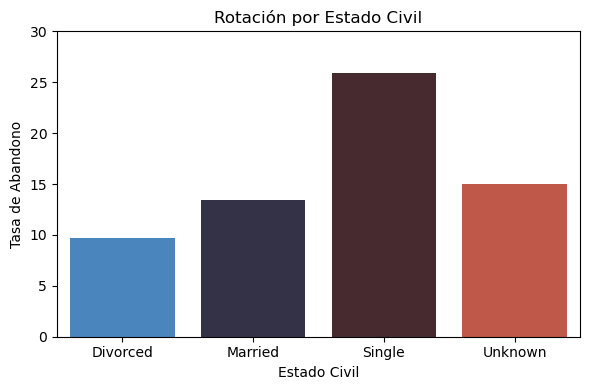

In [55]:
# Gráfico de barras: porcentaje de rotación por estado civil
plt.figure(figsize=(6, 4))
sns.barplot(x=tasa_abandono_estado.index, y=tasa_abandono_estado.values, palette='icefire')

plt.title('Rotación por Estado Civil')
plt.ylabel('Tasa de Abandono')
plt.xlabel('Estado Civil')
plt.ylim(0, 30)
plt.tight_layout()
plt.show()

#### El mismo gráfico pero añadiendo el porcentaje del 'No'

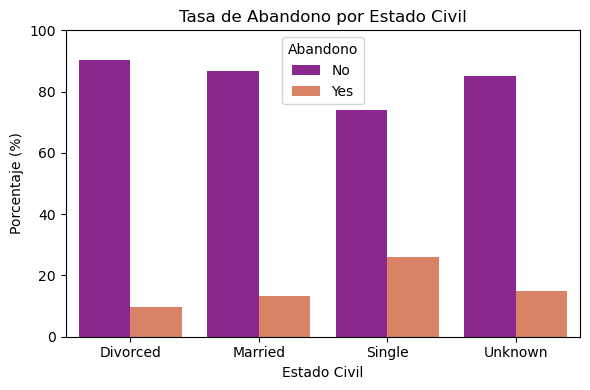

In [56]:
# Agrupar y calcular proporciones normalizadas por estado civil
attrition_by_marital = df.groupby('Marital_Status')['Attrition'].value_counts(normalize=True).unstack().fillna(0)

# Preparar DataFrame para seaborn
df_marital_plot = attrition_by_marital.reset_index().melt(id_vars='Marital_Status', 
                                                          var_name='Attrition', 
                                                          value_name='Proporcion')

# Convertir proporciones a porcentaje
df_marital_plot['Proporcion'] = df_marital_plot['Proporcion'] * 100

# Gráfico
plt.figure(figsize=(6, 4))
sns.barplot(x='Marital_Status', y='Proporcion', hue='Attrition', data=df_marital_plot, palette='plasma')

# Ajustes estéticos
plt.title('Tasa de Abandono por Estado Civil')
plt.xlabel('Estado Civil')
plt.ylabel('Porcentaje (%)')
plt.ylim(0, 100)
plt.legend(title='Abandono')
plt.tight_layout()
plt.show()

#### 4. ¿La educación o campo de estudio influye en la retención?

In [57]:
# Educación
attrition_by_education = df.groupby('Education')['Attrition'].value_counts(normalize=True).unstack().fillna(0)
tasa_abandono_edu = (attrition_by_education['Yes'] * 100).round(2)
tasa_abandono_edu

Education
Bachelor Degree    14.88
Postgraduate        9.43
Primary            18.64
Secundary          15.28
Upper Secundary    17.28
Name: Yes, dtype: float64

In [58]:
# Campo de estudio
attrition_by_field = df.groupby('Education_Field')['Attrition'].value_counts(normalize=True).unstack().fillna(0)
tasa_abandono_campo = (attrition_by_field['Yes'] * 100).round(2)
tasa_abandono_campo

Education_Field
Human Resources     16.67
Life Sciences       13.35
Marketing           21.21
Medical             16.48
Other               12.73
Technical Degree    23.88
Unknown             16.12
Name: Yes, dtype: float64

C:\Users\noemi\AppData\Local\Temp\ipykernel_3496\1466458124.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=tasa_abandono_edu.index, y=tasa_abandono_edu.values, palette='magma' )


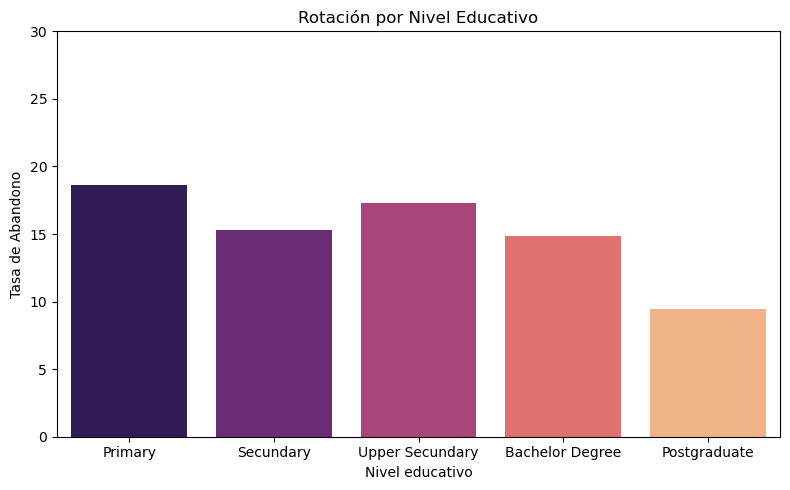

C:\Users\noemi\AppData\Local\Temp\ipykernel_3496\1466458124.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=tasa_abandono_campo.index, y=tasa_abandono_campo.values, palette='viridis')


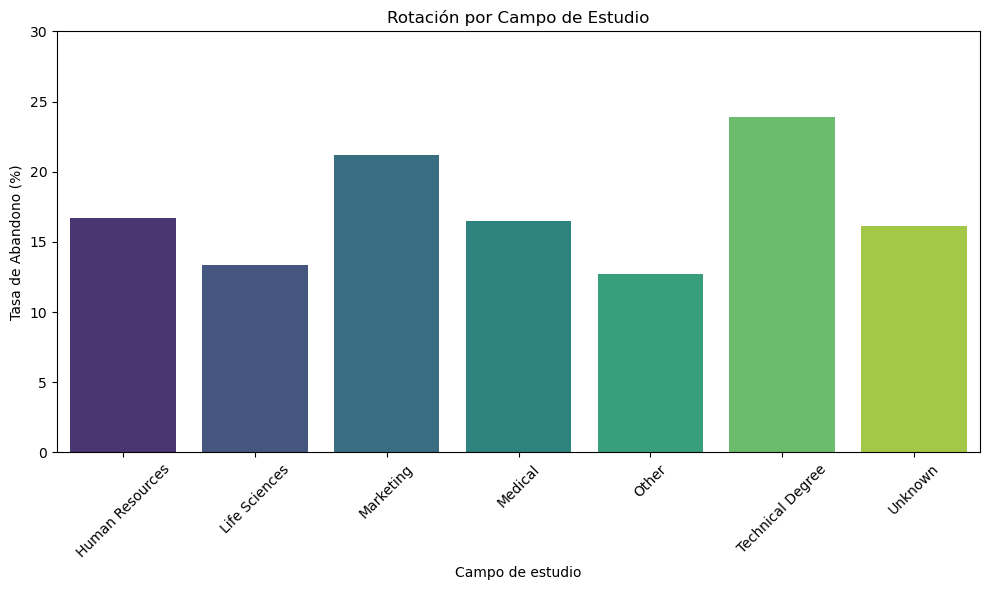

In [59]:
# Educación
orden_educacion = ['Primary','Secundary','Upper Secundary', 'Bachelor Degree', 'Postgraduate']
# Reordenar Series
tasa_abandono_edu = tasa_abandono_edu.reindex(orden_educacion)

plt.figure(figsize=(8, 5))
sns.barplot(x=tasa_abandono_edu.index, y=tasa_abandono_edu.values, palette='magma' )

plt.title('Rotación por Nivel Educativo')
plt.xlabel('Nivel educativo')
plt.ylabel('Tasa de Abandono')
plt.ylim(0, 30)
plt.tight_layout()
plt.show()

# Campo de estudio
plt.figure(figsize=(10, 6))
sns.barplot(x=tasa_abandono_campo.index, y=tasa_abandono_campo.values, palette='viridis')

plt.title('Rotación por Campo de Estudio')
plt.xlabel('Campo de estudio')
plt.ylabel('Tasa de Abandono (%)')
plt.xticks(rotation=45)
plt.ylim(0, 30)
plt.tight_layout()
plt.show()

#### Los mismos gráficos pero añadiendo el porcentaje del 'No'

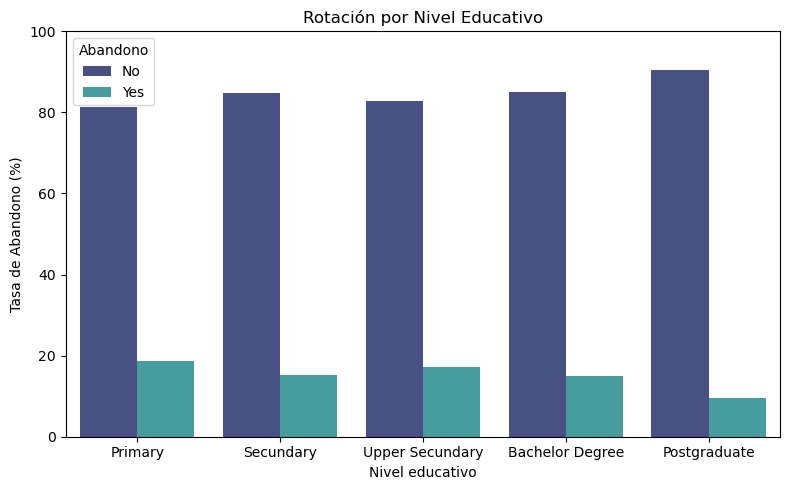

In [60]:
# Educación:
# Orden correcto de nivel educativo (1 = Menos educación, 5 = Más educación)
orden_educacion = ['Primary','Secundary','Upper Secundary', 'Bachelor Degree', 'Postgraduate']

# Agrupar por nivel educativo y normalizar
attrition_by_education = df.groupby('Education')['Attrition'].value_counts(normalize=True).unstack().fillna(0)

# Preparar datos para seaborn
df_edu_plot = attrition_by_education.reset_index().melt(id_vars='Education', 
                                                        var_name='Attrition', 
                                                        value_name='Proporcion')
df_edu_plot['Proporcion'] = df_edu_plot['Proporcion'] * 100

# Ordenar niveles educativos
df_edu_plot['Education'] = pd.Categorical(df_edu_plot['Education'], categories=orden_educacion, ordered=True)
df_edu_plot = df_edu_plot.sort_values('Education')

# Graficar
plt.figure(figsize=(8, 5))
sns.barplot(x='Education', y='Proporcion', hue='Attrition', data=df_edu_plot, palette='mako')

plt.title('Rotación por Nivel Educativo')
plt.xlabel('Nivel educativo')
plt.ylabel('Tasa de Abandono (%)')
plt.ylim(0, 100)
plt.legend(title='Abandono')
plt.tight_layout()
plt.show()

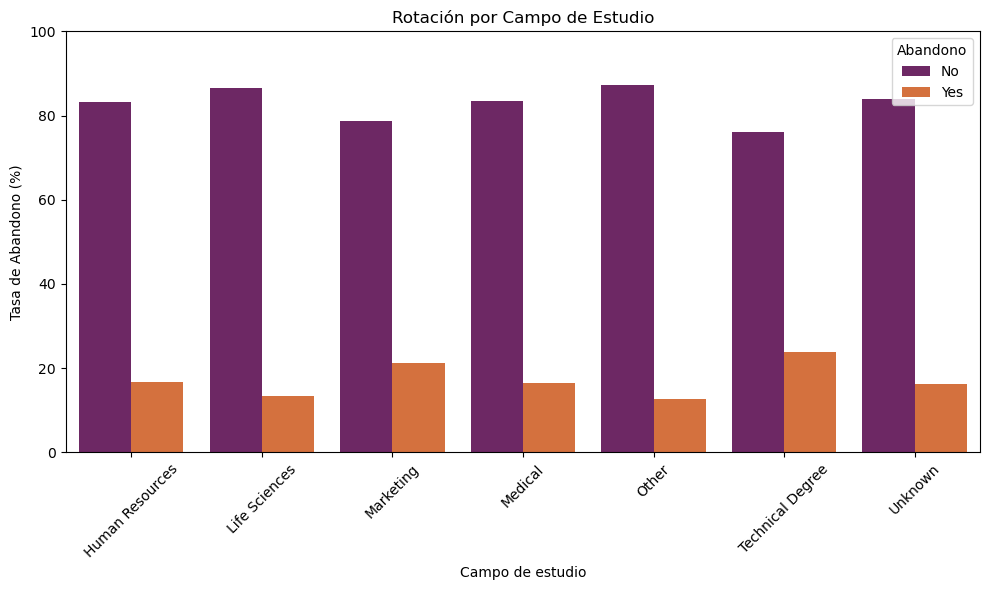

In [61]:
# Campo de estudio:
# Agrupación y transformación
attrition_by_field = df.groupby('Education_Field')['Attrition'].value_counts(normalize=True).unstack().fillna(0)

# Preparar para seaborn
df_field_plot = attrition_by_field.reset_index().melt(id_vars='Education_Field', 
                                                      var_name='Attrition', 
                                                      value_name='Proporcion')
df_field_plot['Proporcion'] = df_field_plot['Proporcion'] * 100

# Graficar
plt.figure(figsize=(10, 6))
sns.barplot(x='Education_Field', y='Proporcion', hue='Attrition', data=df_field_plot, palette='inferno')

plt.title('Rotación por Campo de Estudio')
plt.xlabel('Campo de estudio')
plt.ylabel('Tasa de Abandono (%)')
plt.xticks(rotation=45)
plt.ylim(0, 100)
plt.legend(title='Abandono')
plt.tight_layout()
plt.show()

#### Conclusiones:

📊 1. Rotación por Edad

    - La tasa de abandono disminuye progresivamente con la edad.

    - Los empleados más jóvenes (20-30 años) presentan una tasa de rotación significativamente más alta.

    - Esto puede reflejar una mayor búsqueda de oportunidades, menor estabilidad laboral o insatisfacción temprana en sus carreras.

👥 2. Rotación por Generación

    - Gen Z y Centennials tienen las tasas de abandono más elevadas.

    - En cambio, Gen X y Boomers muestran mayor permanencia.

    - Esto confirma la tendencia de que las generaciones más jóvenes cambian de trabajo con más frecuencia, posiblemente buscando mejores condiciones o desarrollo profesional más rápido.

⚧️ 3. Rotación por Género

    - Las tasas de abandono entre hombres y mujeres son relativamente similares, con una leve variación que puede no ser estadísticamente significativa.

    - No se observa una diferencia clara de rotación que se pueda atribuir directamente al género.

💍 4. Rotación por Estado Civil

    - Las personas solteras muestran una tasa de rotación más alta en comparación con personas casadas o divorciadas.

    - Esto puede sugerir que los empleados con responsabilidades familiares tienden a priorizar la estabilidad laboral.

    - También podría indicar que los solteros tienen más flexibilidad para cambiar de trabajo o tomar riesgos laborales.

    - Tner en cuenta la edad (son la mayoria de solteros)

🎓 5. Rotación por Nivel Educativo

    - La tasa de abandono disminuye ligeramente a medida que aumenta el nivel educativo.

    - Empleados con educación básica (Primary, Secondary) tienden a abandonar más que quienes tienen títulos de Bachelor o Postgrado.

    - Esto puede reflejar una mejor adecuación de expectativas y oportunidades para los más calificados, o un mayor compromiso con la empresa.

🧪 6. Rotación por Campo de Estudio

    - Algunos campos de estudio presentan mayores tasas de rotación, como por ejemplo MK o Technical Degree (dependiendo del dataset).

    - Otros campos, como Medical o Life Sciences, muestran tasas de abandono más bajas.

    - Esto puede deberse a diferencias en las oportunidades de carrera, satisfacción laboral o rotación típica en cada sector profesional.

#### `Antigüedad`

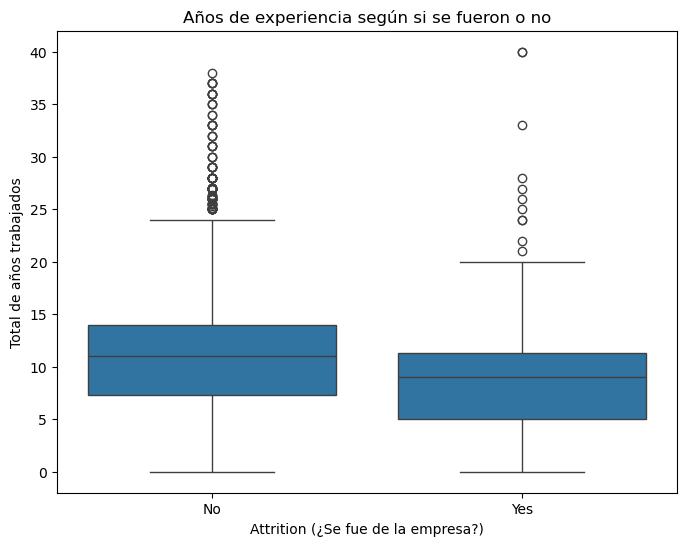

In [62]:
#2. ¿La experiencia total (Total_Working_Years) afecta a la decisión?
plt.figure(figsize=(8, 6))
sns.boxplot(x='Attrition', y='Total_Working_Years', data=df)
plt.title('Años de experiencia según si se fueron o no')
plt.xlabel('Attrition (¿Se fue de la empresa?)')
plt.ylabel('Total de años trabajados')
plt.show()

#PREGUNTAR SI EN ESOS AÑOS PRIMEROS DECISIVOS, HAY POSIBILIDAD DE PROMOCION O NO O SUBIDA DE SULADO O NO

 Años de Experiencia y Decisión de Permanencia
Este diagrama de caja compara la distribución de años de experiencia entre empleados que se quedaron en la empresa (Attrition: No) y aquellos que decidieron irse (Attrition: Yes).

Empleados que se quedaron:
La mayoría presenta entre 7 y 14 años de experiencia, con una mediana cercana a los 11-12 años. Se observan numerosos valores atípicos que representan empleados con más de 40 años de experiencia, lo que sugiere que quienes tienen una trayectoria larga tienden a permanecer en la organización.

Empleados que se fueron:
La experiencia de este grupo se concentra entre 5 y 11 años, con una mediana alrededor de 8-9 años, ligeramente inferior a la del grupo que permaneció. Aunque hay algunos casos de alta experiencia, son menos frecuentes.

Conclusión: Los empleados con más años de experiencia parecen mostrar mayor retención. Las salidas se concentran principalmente entre quienes tienen una experiencia intermedia o moderada.

## 5. OTRAS CONSULTAS MENOS RELEVANTES

#### Formación en los últimos años

C:\Users\noemi\AppData\Local\Temp\ipykernel_3496\3351802212.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  edu_form = df.groupby(['Education', 'Attrition'])['Training_Times_Last_Year'].mean().reset_index()


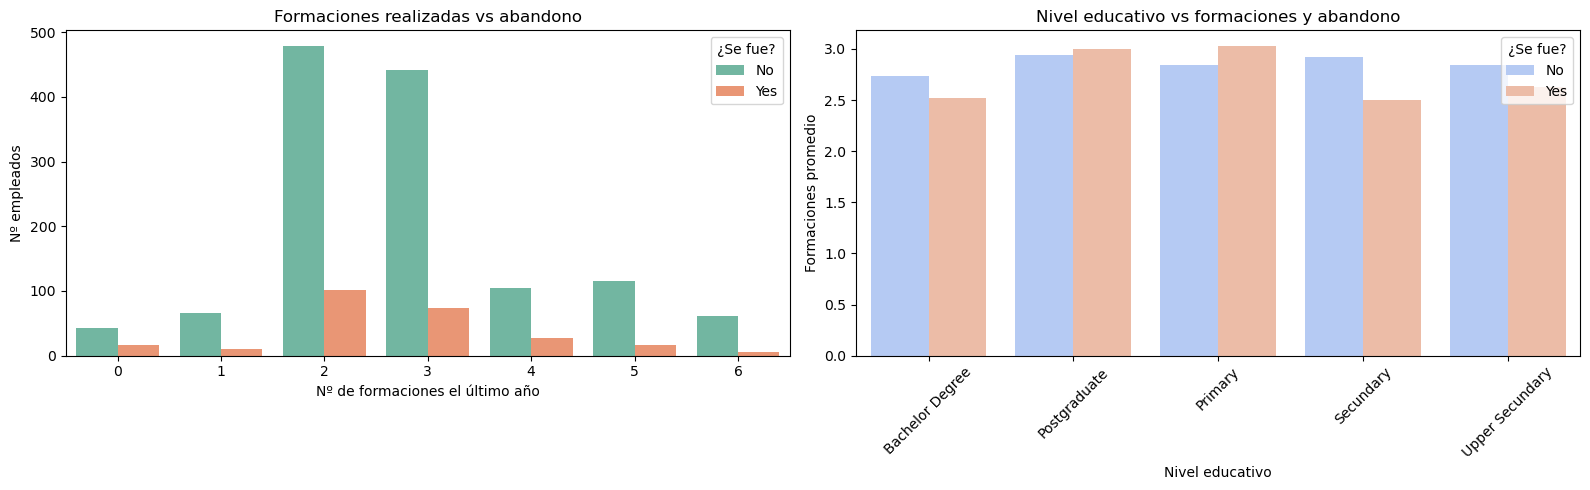

In [63]:
# Crear figura con 1 fila y 2 columnas
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# 1Gráfico principal: Formaciones vs Abandono
sns.countplot(data=df, x='Training_Times_Last_Year', hue='Attrition',
              palette='Set2', ax=axes[0])
axes[0].set_title("Formaciones realizadas vs abandono")
axes[0].set_xlabel("Nº de formaciones el último año")
axes[0].set_ylabel("Nº empleados")
axes[0].legend(title="¿Se fue?")


# 2Gráfico alternativo: Formación promedio por educación y abandono
# Agrupar por nivel educativo y abandono, y calcular media de formaciones
edu_form = df.groupby(['Education', 'Attrition'])['Training_Times_Last_Year'].mean().reset_index()

# Gráfico de barras con formación promedio
sns.barplot(data=edu_form, x='Education', y='Training_Times_Last_Year', hue='Attrition',
            palette='coolwarm', ax=axes[1])
axes[1].set_title("Nivel educativo vs formaciones y abandono")
axes[1].set_xlabel("Nivel educativo")
axes[1].set_ylabel("Formaciones promedio")
axes[1].legend(title="¿Se fue?")
axes[1].tick_params(axis='x', rotation=45)

# Ajustar diseño
plt.tight_layout()
plt.show()

### ✅ Conclusiones sobre formación y abandono

 1. La mayoría de abandonos se concentran en empleados con 0 o 1 formación al año.
    → La falta de desarrollo profesional está claramente asociada a la rotación.

 2. Quienes reciben 2 o 3 formaciones muestran mayor estabilidad.
    → La formación continua es un buen mecanismo de retención.

 3. En niveles de 5-6 formaciones hay algunos abandonos, aunque son casos menos representativos.
    → Podrían deberse a saturación, reestructuraciones u otros factores.

 🔍 Análisis cruzado con Education:
 - Empleados con menor nivel educativo (1 y 2) reciben menos formación, y además abandonan más si no se forman.
 - A mayor nivel educativo, hay más formación y menor rotación, incluso con menos formación interna.
 - El capital formativo previo puede amortiguar la frust


#### Tiempo sin promoción 

C:\Users\noemi\AppData\Local\Temp\ipykernel_3496\2763263021.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.pointplot(data=df, x='Job_Level', y='Years_Since_Last_Promotion', ci='sd', ax=axes[0])
C:\Users\noemi\AppData\Local\Temp\ipykernel_3496\2763263021.py:20: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='Job_Satisfaction', y='Years_Since_Last_Promotion',
C:\Users\noemi\AppData\Local\Temp\ipykernel_3496\2763263021.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Job_Satisfaction', y='Years_Since_Last_Promotion',


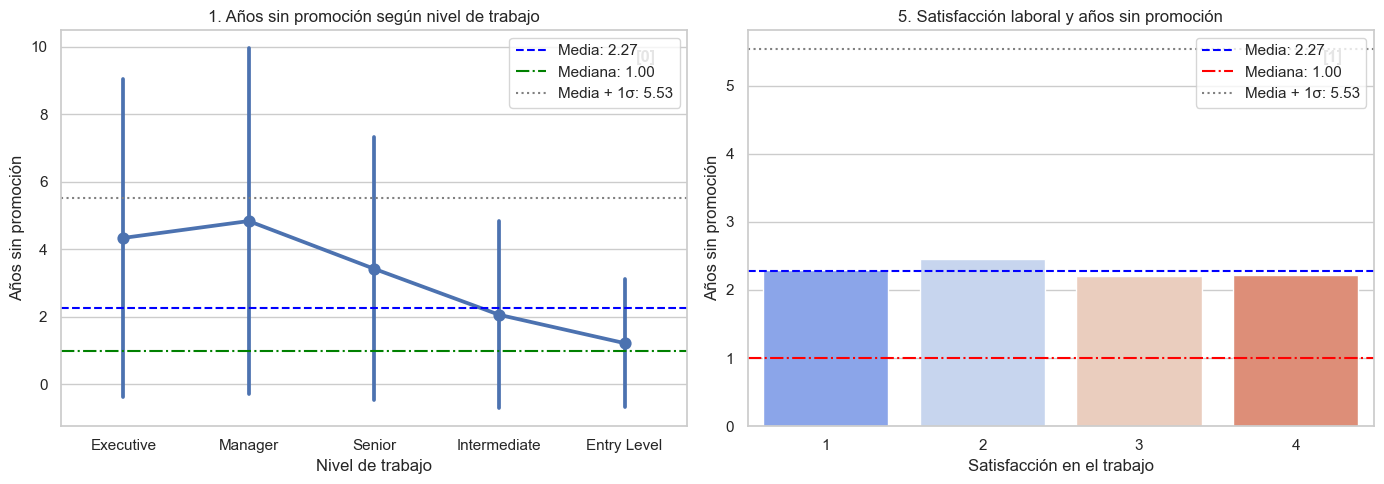

In [67]:
sns.set(style="whitegrid")
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
axes = axes.flatten()
# Estadísticas generales de Years_Since_Last_Promotion
mean_val = df['Years_Since_Last_Promotion'].mean()
median_val = df['Years_Since_Last_Promotion'].median()
std_val = df['Years_Since_Last_Promotion'].std()
# 1️Nivel de trabajo vs años sin promoción (con desviación estándar)
sns.pointplot(data=df, x='Job_Level', y='Years_Since_Last_Promotion', ci='sd', ax=axes[0])
axes[0].axhline(mean_val, color='blue', linestyle='--', label=f'Media: {mean_val:.2f}')
axes[0].axhline(median_val, color='green', linestyle='-.', label=f'Mediana: {median_val:.2f}')
axes[0].axhline(mean_val + std_val, color='gray', linestyle=':', label=f'Media + 1σ: {(mean_val + std_val):.2f}')
axes[0].set_title("1. Años sin promoción según nivel de trabajo")
axes[0].set_xlabel("Nivel de trabajo")
axes[0].set_ylabel("Años sin promoción")
axes[0].legend(loc='upper right')
axes[0].text(0.95, 0.95, '[0]', transform=axes[0].transAxes,
             fontsize=12, fontweight='bold', color='gray', ha='right', va='top')
# 2️Satisfacción laboral vs años sin promoción (sin líneas negras)
sns.barplot(data=df, x='Job_Satisfaction', y='Years_Since_Last_Promotion',
            ci=None, palette='coolwarm', ax=axes[1])
axes[1].axhline(mean_val, color='blue', linestyle='--', label=f'Media: {mean_val:.2f}')
axes[1].axhline(median_val, color='red', linestyle='-.', label=f'Mediana: {median_val:.2f}')
axes[1].axhline(mean_val + std_val, color='gray', linestyle=':', label=f'Media + 1σ: {(mean_val + std_val):.2f}')
axes[1].set_title("5. Satisfacción laboral y años sin promoción")
axes[1].set_xlabel("Satisfacción en el trabajo")
axes[1].set_ylabel("Años sin promoción")
axes[1].legend(loc='upper right')
axes[1].text(0.95, 0.95, '[1]', transform=axes[1].transAxes,
             fontsize=12, fontweight='bold', color='gray', ha='right', va='top')
plt.tight_layout()
plt.show()

✅ Conclusiones

1. Estancamiento en niveles bajos

La primera gráfica muestra que los empleados de **niveles jerárquicos bajos** acumulan más años sin promoción. Esta situación genera una percepción clara de **estancamiento estructural**, lo que puede derivar en frustración y deseo de abandono. Este patrón se conecta directamente con el hallazgo de que **los empleados con antigüedad y sin crecimiento profesional tienden a irse**.

2. Estancamiento = insatisfacción

La segunda gráfica revela una relación directa entre **años sin promoción y baja satisfacción laboral**. Es decir, a medida que un empleado pasa más tiempo sin reconocimiento o ascenso, su nivel de satisfacción cae, aumentando así el **riesgo de rotación**.



🧩 Conclusión integradora del estudio

Tu investigación demuestra que el abandono laboral no es un fenómeno aleatorio, sino **una consecuencia acumulativa de estancamiento, baja satisfacción y falta de desarrollo**. La falta de promoción aparece como una **variable central**, que además se entrelaza con:

* **El nivel de trabajo (más abandono en niveles bajos sin promoción)**
* **La implicación laboral (no siempre recompensada)**
* **La antigüedad (cuanto más tiempo sin promoción, más riesgo de abandono)**
* **La ausencia de formación (sin formación = sin evolución)**

> En resumen: **la falta de crecimiento profesional es el principal motor silencioso del abandono**, especialmente cuando se acumula con desmotivación, poca formación o implicación no reconocida.

#### Stock_Option_Level vs Job_Level

Este gráfico muestra cuántos empleados de cada **nivel de trabajo** (Entry, Intermediate, Senior, Manager, Executive) tienen acceso a distintos **niveles de stock options** (0, 1, 2 o 3).

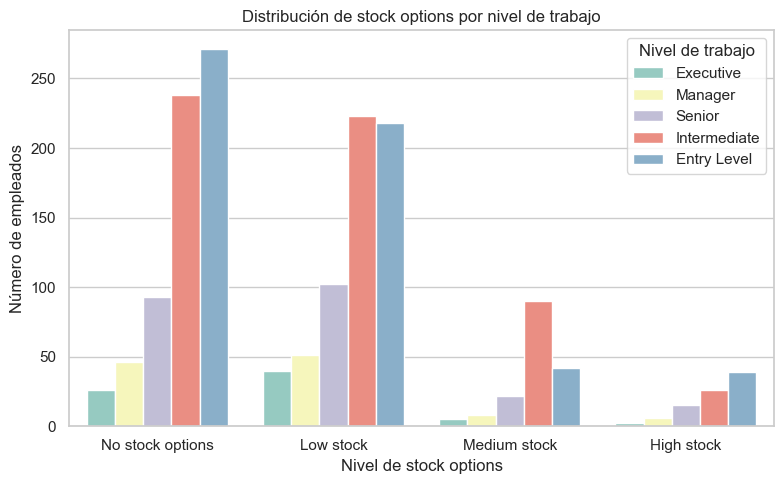

In [65]:
# Gráfico
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Stock_Option_Level', hue='Job_Level', palette='Set3')
plt.title("Distribución de stock options por nivel de trabajo")
plt.xlabel("Nivel de stock options")
plt.ylabel("Número de empleados")
plt.legend(title="Nivel de trabajo", loc='upper right')
plt.tight_layout()
plt.show()


### ✅ Conclusiones sobre stock options y nivel laboral

 1. El nivel 0 de stock options está presente en todos los niveles, pero predomina en Entry Level e Intermediate.
    → La mayoría de empleados no recibe incentivos accionarios, especialmente los que están empezando.

 2. Los niveles 2 y 3 de stock options se concentran en empleados Senior, Managers y Executives.
    → Reflejan incentivos financieros ligados a permanencia estratégica y toma de decisiones.

 3. Prácticamente no hay Managers ni Executives sin stock options (nivel 0).
    → Estos beneficios son parte del paquete estándar en puestos directivos.

 4. Muchos empleados Senior están en nivel 0.
    → Puede ser un foco de frustración o fuga si no se les compensa por otras vías (salario, promoción, formación).
    → Zona de riesgo silenciosa: experiencia sin reconocimiento a largo plazo.



## 5 ¿Se van más los empleados con alta formación y bajo salario?

C:\Users\noemi\AppData\Local\Temp\ipykernel_3496\3592867324.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=tasa_infravalorados,


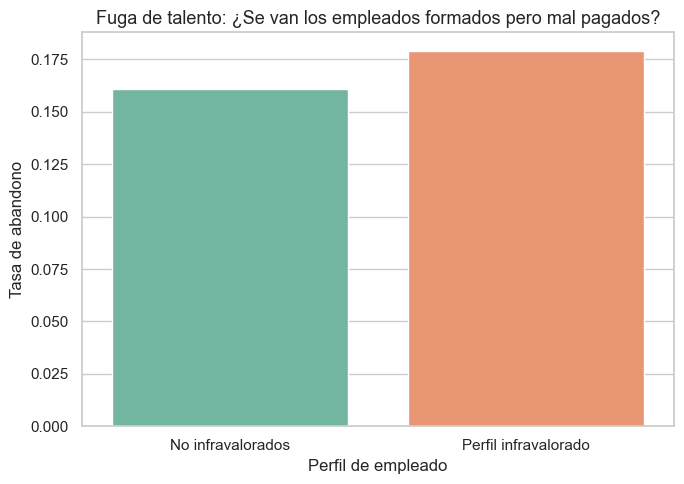

In [66]:

# Paso 1: Mapear educación a número
education_map = {
    'Primary': 1,
    'Secondary': 2,
    'Upper Secundary': 3,
    'Bachelor Degree': 4,
    'Postgraduate': 5
}
df['Education_Level'] = df['Education'].map(education_map)

# Paso 2: Eliminar posibles nulos
df = df[df['Education_Level'].notna() & df['Monthly_Income'].notna()]

# Paso 3: Crear columna 'Perfil_Infravalorado' como tipo booleano explícito
salario_threshold = df['Monthly_Income'].quantile(0.4)
df['Perfil_Infravalorado'] = (
    (df['Education_Level'] >= 4) & 
    (df['Monthly_Income'] < salario_threshold)
).astype(bool)

# Paso 5: Agrupar y calcular tasa
df['Perfil_Infravalorado'] = df['Perfil_Infravalorado'].astype(str)  # 👈 Evitamos tipo "category"
tasa_infravalorados = df.groupby('Perfil_Infravalorado')['Attrition_Flag'].mean().reset_index()

# Paso 6: Etiquetas amigables
tasa_infravalorados['Perfil_Infravalorado'] = tasa_infravalorados['Perfil_Infravalorado'].map({
    'False': 'No infravalorados',
    'True': 'Perfil infravalorado'
})

# Paso 7: Gráfico
sns.set(style="whitegrid")
plt.figure(figsize=(7, 5))

sns.barplot(data=tasa_infravalorados,
            x='Perfil_Infravalorado',
            y='Attrition_Flag',
            palette='Set2')

plt.title("Fuga de talento: ¿Se van los empleados formados pero mal pagados?", fontsize=13)
plt.xlabel("Perfil de empleado", fontsize=12)
plt.ylabel("Tasa de abandono", fontsize=12)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.tight_layout()
plt.show()


### ✅ Conclusiones sobre el perfil infravalorado

 1. Mayor abandono en empleados infravalorados:
 - Abandonan más que los no infravalorados (~18% vs ~16%).
 - Bien formados pero mal pagados = mayor riesgo de fuga.
 - El problema es la incoherencia entre formación y salario.

 2. La percepción de injusticia influye más que los datos objetivos:
 - Sentirse mal recompensado genera desconexión emocional.
 - Puede derivar en estrés crónico y desmotivación.

 3. Se pierde talento valioso:
 - Los perfiles que se van ya están formados y son atractivos fuera.
 - La empresa pierde capital humano y su inversión en desarrollo.

